In [68]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [69]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint

# Computational Mathematics  <a class="tocSkip">

## Linear Algebra 1 <a class="tocSkip">
### (part introduction/reminder/revision depending on your background)  <a class="tocSkip">

## Learning objectives  <a class="tocSkip">
   
   
1. Hopefully for most of you much of this lecture will provide a refresher/reminder on matrices and linear algebra.


2. This lecture will focus on matrix arithmetic, linear systems and their solution; the next lecture will move on to eigenvalues and the solution of *systems* of ODEs.


3. Again there is ample opportunity here for us to practice our coding and plotting, and we will think a bit about code complexity and run times.


4. To gain a further/firmer understanding of some of the key concepts we will make use of geometrical interpretations and examples as much as possible.

## Lecture Plan  <a class="tocSkip">
    
Much of the material in sections 1-7 should be revision for many of you, so I will go through this quite quickly in class. 

The more challenging material starts in section 8 so I will try to get to this promptly in order to spend more time on it.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introductory-comments-[*]" data-toc-modified-id="Introductory-comments-[*]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introductory comments [*]</a></span><ul class="toc-item"><li><span><a href="#Importance-of-linear-algebra-in-machine-learning,-data-science,-computational-science,-..." data-toc-modified-id="Importance-of-linear-algebra-in-machine-learning,-data-science,-computational-science,-...-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importance of linear algebra in machine learning, data science, computational science, ...</a></span></li><li><span><a href="#Notation-&amp;-terminology" data-toc-modified-id="Notation-&amp;-terminology-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notation &amp; terminology</a></span></li><li><span><a href="#Matrix-dimension" data-toc-modified-id="Matrix-dimension-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Matrix dimension</a></span></li><li><span><a href="#Arithmetic-and-other-simple-matrix-operations-(and-some-other-introductory-NumPy-comments)" data-toc-modified-id="Arithmetic-and-other-simple-matrix-operations-(and-some-other-introductory-NumPy-comments)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Arithmetic and other simple matrix operations (and some other introductory NumPy comments)</a></span><ul class="toc-item"><li><span><a href="#Matrix-equivalence" data-toc-modified-id="Matrix-equivalence-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Matrix equivalence</a></span></li><li><span><a href="#Addition-and-subtraction" data-toc-modified-id="Addition-and-subtraction-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Addition and subtraction</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Code</a></span></li><li><span><a href="#Scalar-multiplication" data-toc-modified-id="Scalar-multiplication-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Scalar multiplication</a></span></li><li><span><a href="#Be-careful-about-assignments-vs-copies" data-toc-modified-id="Be-careful-about-assignments-vs-copies-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Be careful about assignments vs copies</a></span></li><li><span><a href="#Matrix-transpose-and-complex-conjugate" data-toc-modified-id="Matrix-transpose-and-complex-conjugate-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Matrix transpose and complex conjugate</a></span><ul class="toc-item"><li><span><a href="#Properties-of-the-transpose-operator" data-toc-modified-id="Properties-of-the-transpose-operator-1.4.6.1"><span class="toc-item-num">1.4.6.1&nbsp;&nbsp;</span>Properties of the transpose operator</a></span></li></ul></li><li><span><a href="#Indexing,-slicing-etc" data-toc-modified-id="Indexing,-slicing-etc-1.4.7"><span class="toc-item-num">1.4.7&nbsp;&nbsp;</span>Indexing, slicing etc</a></span></li><li><span><a href="#Other-useful-NumPy-attributes" data-toc-modified-id="Other-useful-NumPy-attributes-1.4.8"><span class="toc-item-num">1.4.8&nbsp;&nbsp;</span>Other useful NumPy attributes</a></span></li></ul></li></ul></li><li><span><a href="#Matrix-vector-multiplication" data-toc-modified-id="Matrix-vector-multiplication-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matrix-vector multiplication</a></span><ul class="toc-item"><li><span><a href="#Mathematical-definition" data-toc-modified-id="Mathematical-definition-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mathematical definition</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Code</a></span></li><li><span><a href="#Properties" data-toc-modified-id="Properties-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Matrix-multiplication-using-NumPy" data-toc-modified-id="Matrix-multiplication-using-NumPy-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Matrix multiplication using NumPy</a></span><ul class="toc-item"><li><span><a href="#Aside:-matrix-objects-[*]" data-toc-modified-id="Aside:-matrix-objects-[*]-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Aside: matrix objects [*]</a></span></li></ul></li><li><span><a href="#Testing-our-code" data-toc-modified-id="Testing-our-code-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Testing our code</a></span></li><li><span><a href="#Another-useful-interpretation" data-toc-modified-id="Another-useful-interpretation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Another useful interpretation</a></span></li></ul></li><li><span><a href="#Motivation---linear-(or-matrix)-systems" data-toc-modified-id="Motivation---linear-(or-matrix)-systems-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation - linear (or matrix) systems</a></span><ul class="toc-item"><li><span><a href="#A-simple-example" data-toc-modified-id="A-simple-example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A simple example</a></span></li><li><span><a href="#The-general-case" data-toc-modified-id="The-general-case-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The general case</a></span></li><li><span><a href="#A-geometric-interpretation" data-toc-modified-id="A-geometric-interpretation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A geometric interpretation</a></span></li><li><span><a href="#Solving-a-general-linear-system" data-toc-modified-id="Solving-a-general-linear-system-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Solving a general linear system</a></span></li></ul></li><li><span><a href="#Matrix-inverse" data-toc-modified-id="Matrix-inverse-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matrix inverse</a></span><ul class="toc-item"><li><span><a href="#Properties-of-the-matrix-inverse" data-toc-modified-id="Properties-of-the-matrix-inverse-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Properties of the matrix inverse</a></span></li><li><span><a href="#Using-the-inverse-matrix-to-solve-a-linear-system" data-toc-modified-id="Using-the-inverse-matrix-to-solve-a-linear-system-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using the inverse matrix to solve a linear system</a></span><ul class="toc-item"><li><span><a href="#The-inverse-for-our-simple-example" data-toc-modified-id="The-inverse-for-our-simple-example-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>The inverse for our simple example</a></span></li><li><span><a href="#Row-operations-and-a-glimpse-at-Gaussian-elimination-[*---please-read-through-this-in-your-own-time]" data-toc-modified-id="Row-operations-and-a-glimpse-at-Gaussian-elimination-[*---please-read-through-this-in-your-own-time]-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Row operations and a glimpse at Gaussian elimination [* - please read through this in your own time]</a></span></li><li><span><a href="#Solving-our-simple-example-using-the-inverse-matrix" data-toc-modified-id="Solving-our-simple-example-using-the-inverse-matrix-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Solving our simple example using the inverse matrix</a></span></li></ul></li><li><span><a href="#Aside:-constructing-some-useful-simple-matrices-in-NumPy-[*]" data-toc-modified-id="Aside:-constructing-some-useful-simple-matrices-in-NumPy-[*]-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Aside: constructing some useful simple matrices in NumPy [*]</a></span><ul class="toc-item"><li><span><a href="#The-identity-matrix" data-toc-modified-id="The-identity-matrix-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>The identity matrix</a></span></li><li><span><a href="#Diagonal-matrices" data-toc-modified-id="Diagonal-matrices-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Diagonal matrices</a></span></li><li><span><a href="#Matrices-of-zeros-or-ones,-empty-matrices" data-toc-modified-id="Matrices-of-zeros-or-ones,-empty-matrices-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Matrices of zeros or ones, empty matrices</a></span></li></ul></li></ul></li><li><span><a href="#The-determinant" data-toc-modified-id="The-determinant-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The determinant</a></span></li><li><span><a href="#Matrix-vector-multiplication-(again;-code-speed)-[*]" data-toc-modified-id="Matrix-vector-multiplication-(again;-code-speed)-[*]-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Matrix-vector multiplication (again; code speed) [*]</a></span><ul class="toc-item"><li><span><a href="#Testing-our-code" data-toc-modified-id="Testing-our-code-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Testing our code</a></span></li><li><span><a href="#Checking-the-speed-of-our-code!" data-toc-modified-id="Checking-the-speed-of-our-code!-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Checking the speed of our code!</a></span></li></ul></li><li><span><a href="#Matrix-matrix-product-[*]" data-toc-modified-id="Matrix-matrix-product-[*]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Matrix-matrix product [*]</a></span><ul class="toc-item"><li><span><a href="#Conformable-dimensions" data-toc-modified-id="Conformable-dimensions-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Conformable dimensions</a></span></li><li><span><a href="#Properties" data-toc-modified-id="Properties-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Code</a></span><ul class="toc-item"><li><span><a href="#Testing-our-code" data-toc-modified-id="Testing-our-code-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Testing our code</a></span></li></ul></li></ul></li><li><span><a href="#Some-linear-algebra-theory" data-toc-modified-id="Some-linear-algebra-theory-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Some linear algebra theory</a></span><ul class="toc-item"><li><span><a href="#The-determinant-(again)" data-toc-modified-id="The-determinant-(again)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>The determinant (again)</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Full-definition-[*]" data-toc-modified-id="Full-definition-[*]-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Full definition [*]</a></span></li></ul></li><li><span><a href="#The-inverse-matrix" data-toc-modified-id="The-inverse-matrix-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>The inverse matrix</a></span><ul class="toc-item"><li><span><a href="#$2\times-2$-case" data-toc-modified-id="$2\times-2$-case-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>$2\times 2$ case</a></span></li><li><span><a href="#$n\times-n$-case" data-toc-modified-id="$n\times-n$-case-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>$n\times n$ case</a></span></li></ul></li><li><span><a href="#Using-SciPy-to-compute-the-inverse-matrix" data-toc-modified-id="Using-SciPy-to-compute-the-inverse-matrix-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Using SciPy to compute the inverse matrix</a></span></li><li><span><a href="#Singular-matrices" data-toc-modified-id="Singular-matrices-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Singular matrices</a></span></li><li><span><a href="#Solvability-of-linear-systems" data-toc-modified-id="Solvability-of-linear-systems-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Solvability of linear systems</a></span><ul class="toc-item"><li><span><a href="#Linear-(in)dependence" data-toc-modified-id="Linear-(in)dependence-8.5.1"><span class="toc-item-num">8.5.1&nbsp;&nbsp;</span>Linear (in)dependence</a></span></li><li><span><a href="#A-basis-for-a-vector-space" data-toc-modified-id="A-basis-for-a-vector-space-8.5.2"><span class="toc-item-num">8.5.2&nbsp;&nbsp;</span>A basis for a vector space</a></span></li><li><span><a href="#An-example-|-the-geometrical-interpretation-of-matrix-vector-multiplication" data-toc-modified-id="An-example-|-the-geometrical-interpretation-of-matrix-vector-multiplication-8.5.3"><span class="toc-item-num">8.5.3&nbsp;&nbsp;</span>An example | the geometrical interpretation of matrix vector multiplication</a></span></li><li><span><a href="#Solvability-theory---some-equivalent-properties" data-toc-modified-id="Solvability-theory---some-equivalent-properties-8.5.4"><span class="toc-item-num">8.5.4&nbsp;&nbsp;</span>Solvability theory - some equivalent properties</a></span></li><li><span><a href="#Rank,-range-and-null-Space-[*---please-read-through-these-definitons-in-your-own-time---important-concepts,-but-can-be-skipped-if-you're-struggling]" data-toc-modified-id="Rank,-range-and-null-Space-[*---please-read-through-these-definitons-in-your-own-time---important-concepts,-but-can-be-skipped-if-you're-struggling]-8.5.5"><span class="toc-item-num">8.5.5&nbsp;&nbsp;</span>Rank, range and null-Space [* - please read through these definitons in your own time - important concepts, but can be skipped if you're struggling]</a></span><ul class="toc-item"><li><span><a href="#Rank" data-toc-modified-id="Rank-8.5.5.1"><span class="toc-item-num">8.5.5.1&nbsp;&nbsp;</span>Rank</a></span></li><li><span><a href="#Range" data-toc-modified-id="Range-8.5.5.2"><span class="toc-item-num">8.5.5.2&nbsp;&nbsp;</span>Range</a></span></li><li><span><a href="#The-null-space" data-toc-modified-id="The-null-space-8.5.5.3"><span class="toc-item-num">8.5.5.3&nbsp;&nbsp;</span>The null-space</a></span></li><li><span><a href="#The-rank-nullity-theorem" data-toc-modified-id="The-rank-nullity-theorem-8.5.5.4"><span class="toc-item-num">8.5.5.4&nbsp;&nbsp;</span>The rank-nullity theorem</a></span></li></ul></li><li><span><a href="#Solving-our-simple-example-(again)" data-toc-modified-id="Solving-our-simple-example-(again)-8.5.6"><span class="toc-item-num">8.5.6&nbsp;&nbsp;</span>Solving our simple example (again)</a></span></li></ul></li></ul></li><li><span><a href="#Geometric-interpretation-of-linear-transformations-[*---assuming-we-have-run-out-of-time,-please-read-through-this-section-as-we-will-pick-up-the-next-lecture-from-these-ideas]" data-toc-modified-id="Geometric-interpretation-of-linear-transformations-[*---assuming-we-have-run-out-of-time,-please-read-through-this-section-as-we-will-pick-up-the-next-lecture-from-these-ideas]-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Geometric interpretation of linear transformations [* - assuming we have run out of time, please read through this section as we will pick up the next lecture from these ideas]</a></span><ul class="toc-item"><li><span><a href="#Some-examples" data-toc-modified-id="Some-examples-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Some examples</a></span></li><li><span><a href="#A-general-transformation-and-the-determinant-again-[*]" data-toc-modified-id="A-general-transformation-and-the-determinant-again-[*]-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>A general transformation and the determinant again [*]</a></span></li></ul></li><li><span><a href="#An-animation-[*]" data-toc-modified-id="An-animation-[*]-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>An animation [*]</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Next-lecture" data-toc-modified-id="Next-lecture-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Next lecture</a></span></li></ul></li></ul></div>

<div class="optional">

# Introductory comments [*]

[This whole intro section is starred as I will go through it quickly in order to move on to more interesting and challenging material (section 8 onwards).]
    
Linear algebra comes up absolutely everywhere in computational/data science (and elsewhere!).

It's important that we have a firm grasp of the mathematical/conceptual aspects, as well as the numerical aspects and the software tools at our disposal.

In this lecture we're going to briefly review the former and make a start at some of the latter.

***As said previously - your backgrounds are quite varied so for some of you much of this material will already be very familiar, while for some of you some parts may be new. There is a lot of material here, we will start simply but try to move quite rapidly.***

This material will give us ample opportunity to practice our use of NumPy and SciPy, and to gain further experience in plotting.
    
</div>

If nothing else, at the end of this lecture you should understand how to create animations like this using linear algebra

<video controls loop width="600" src="animations/logo-L2-v1.mp4"/>

and then be able to extend to things like this

<video controls loop width="600" src="animations/logo-L2-v2.mp4"/>

## Importance of linear algebra in machine learning, data science, computational science, ...

Some reading to help justify why spending time on linear algebra is important:


- What is the importance of learning linear algebra for data science? <https://www.linkedin.com/pulse/what-importance-learning-linear-algebra-data-science-marcos-conci/>

> "When it comes to data science, many people tend to overlook the importance of linear algebra, ... This oversight is understandable, as modern tools and frameworks often abstract away the underlying mathematical principles that drive these algorithms."

> "It is true that one can implement various machine learning and data science algorithms without delving deep into the math behind them. However, having a solid understanding of linear algebra offers a new perspective on these algorithms and opens up additional avenues for exploration and innovation."

> "In the ever-evolving landscape of data science, a strong foundation in linear algebra is essential for success. Linear algebra serves as the backbone of critical concepts and techniques used in data analysis, machine learning, and optimization. It empowers data scientists to extract meaningful insights from complex datasets and navigate the intricate world of AI, ML, robotics, and computer vision."



- Why is linear algebra essential in machine learning? <https://tivadardanka.com/blog/linear-algebra-in-machine-learning>

> "...linear algebra plays a crucial part in machine learning. From classical algorithms to state-of-the-art, it is everywhere..."


- Linear Algebra for Data Science <https://www.kdnuggets.com/2022/07/linear-algebra-data-science.html> 
    
> "Linear algebra is an essential tool in data science and machine learning. Thus, beginners interested in data science must familiarize themselves with essential concepts in linear algebra."


- 5 Reasons to Learn Linear Algebra for Machine Learning <https://machinelearningmastery.com/why-learn-linear-algebra-for-machine-learning/>

The above reference gives a more balanced view, but fundamentally that:
> "... In this post, you will discover why machine learning practitioners should study linear algebra to improve their skills and capabilities as practitioners....
a deeper understanding of linear algebra is required for intermediate machine learning practitioners."


- It all boils down to linear algebra <https://www.johndcook.com/blog/2015/12/07/linear-algebra/>

>"Applied math is mostly mathematical physics. Mathematical physics is mostly differential equations. Numerical solution of differential equations boils down to linear algebra. Therefore the heart of applied math is linear algebra."


- <https://www.quora.com/Do-I-need-to-learn-linear-algebra-before-I-dive-into-machine-learning>

Various discussions here, I just pull out one comment:
> "To become a full stack AI/ML engineer, it is imperative that you have a complete grasp of the mathematical foundations of ML so that you can build upon concepts easily. The basic mathematical skills required are Linear Algebra, Matrix Algebra, Probability and some basic Calculus."


## Notation & terminology


- We will use bold fonts to indicate vectors, e.g. $\boldsymbol{x } $ :

$$ \boldsymbol{x} = (x_1,x_2,\ldots, x_m)^T$$

[the transpose is here since we generally assume a vector is a *column* vector (i.e. has dimension, or shape, $m\times 1$), but it's clearly easier and more compact to display it as the transpose of a *row* vector in writing - note that when writing on paper it's common to indicate a bold symbol with an underline: $\boldsymbol{x} \equiv \underline{x} $. Sometimes people also use the notation $\vec{x}$ to indicate a vector.]

- and capital letters to indicate matrices, e.g. $A$:

$$A = 
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}$$


- Subscript letters or numbers will be used to indicate components of arrays or matrices, e.g. $x_i$ is the $i$-th component of the vector $\boldsymbol{x}$, and $a_{ij}$ is the entry from the $i$-th row and the $j$-th column of the matrix $A$, with of course us needing to be careful over our numbering which starts from zero in our Python implementations.


- We will identify column vectors making up the matrix $A$ as

$$A = \begin{pmatrix}
      &     &         &     \\
  \boldsymbol{a}_{\,:1} & \boldsymbol{a}_{\,:2} &  \ldots & \boldsymbol{a}_{\,:n} \\
      &     &         &     
\end{pmatrix}$$

i.e. $\boldsymbol{a}_{\,:j}$ indicates the $j$-th column of matrix $A$.



- Square or rounded (i.e. paretheses) brackets are both fine for vectors and matrices (not for intervals where they mean different things!). 

<br>


See also <https://en.wikipedia.org/wiki/Matrix_(mathematics)#Notation>

Note that I've made the choice to start my indices at '1' for the purposes of writing things down mathematically. 

You could choose to start with '0' to better match Python indexing if you want, you just need to be consistent.

## Matrix dimension

A general [matrix](https://en.wikipedia.org/wiki/Matrix_(mathematics)) of dimension (shape in NumPy) $m \times n$ is

\begin{pmatrix}
    a_{11} & a_{12} & \dots & a_{1n} \\
    a_{21} & a_{22} & \dots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1} & a_{m2} & \dots & a_{mn}   
\end{pmatrix}

where for a real matrix all *entries* $a_{ij}\in\mathbb{R}$, i.e. are real numbers, and for a complex matrix $a_{ij}\in\mathbb{C}$.  

Mathematically we could also write $A\in\mathbb{R}^{m\times n}$ or $A\in\mathbb{C}^{m\times n}$.

We would say out loud that the matrix is of dimension "m rows by n columns" or just "m by n".

The convention is to state the number of rows first, and columns second - we will see why this is sensible when we talk about matrix multiplication - indeed thinking about matrix multiplication is exactly how I remember that incrementing the first index ($i$) means we move down, and incrementing the second index ($j$) means we move to the right.

A *square* matrix is one where $m=n$.

An $m\times 1$ matrix is also a *column vector*.

A $1\times n$ matrix is also a *row vector*.

## Arithmetic and other simple matrix operations (and some other introductory NumPy comments)

We can also use the notation

$$A = [a_{ij}]_{m\times n}$$

as shorthand to indicate that matrix $A$ is of dimension ${m\times n}$ with entries signified by the variables $a_{ij}$.

### Matrix equivalence

We can use this notation to define how two matrices are equivalent - there individually entires each need to be equivalent:

$$A = B \iff  a_{ij} = b_{ij}, \quad \forall\; 1\leq i \leq m,\;\; 1\leq j \leq n$$

Note that this definition only make sense if we are comparing matrices of the same size.

In case you haven't seen it before $\forall$ is mathematical shorthand notation for "for all" (https://en.wikipedia.org/wiki/Universal_quantification).

NB. when proving things in mathamtical analysis, sequences etc, it's often used with a symbol for "there exists": $\exists$.

In [70]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [3, 4]])

# the following compares element-wise
print(A==B)
# above works on pairs of entries element-wise, 

# while array_equal looks at the whole array.
print(np.array_equal(A,B))

# change one of the entries
B = np.array([[1, 2], [3, 5]])

print('\n',A==B)
print(np.array_equal(A,B))

[[ True  True]
 [ True  True]]
True

 [[ True  True]
 [ True False]]
False


### Addition and subtraction

With this notation we can also succinctly define the operation of adding two matrices (with the implicit requirement that the two matrices are of the same dimension)

$$A + B = [a_{ij} + b_{ij}]_{m\times n}$$

and similar for subtraction.

Let's check the mathematical description agrees with NumPy!

In [71]:
# any old matrix
A = np.array([[1, 2], [3, 4]])

print('A =\n', A, '\n')
# The '\n's start new lines and are used just to make the printed text easier to read.

# and another one
B = np.array([[6, -2], [1, -7]])

print('B =\n', B, '\n')

C = A+B 

print('A+B =\n', C, '\n')

print('A-B =\n', A-B, '\n')

A =
 [[1 2]
 [3 4]] 

B =
 [[ 6 -2]
 [ 1 -7]] 

A+B =
 [[ 7  0]
 [ 4 -3]] 

A-B =
 [[-5  4]
 [ 2 11]] 



What happens when we try to perform arithmetic with matrices of different sizes?

Remember that error/warning messages should be designed (by you and by other) to help the user - when you get an error/warning read it and try to understand what it's telling you!

If you're note sure Google it!

In [72]:
A = np.array([[1, 2], [3, 4]])
print('A =\n', A, '\n')
B = np.array([[6, -2], [1, -7], [5, -1]])
print('B =\n', B,'\n')
C = A+B

A =
 [[1 2]
 [3 4]] 

B =
 [[ 6 -2]
 [ 1 -7]
 [ 5 -1]] 



ValueError: operands could not be broadcast together with shapes (2,2) (3,2) 

### Code

For practice, let's code up our own function to perform matrix addition and check it against the NumPy result for some examples.

We'll also look a bit more at the use of some NumPy functions to check for the equivalence of arrays.

In [73]:
def mat_mat_addition(A,B):
    """ Return the addition A+B
    """
    mA, nA = np.shape(A)
    mB, nB = np.shape(B)
    # add a check that the two provided matrices are the same size
    assert mA==mB and nA==nB 
    # initialise some space for the result
    C = np.zeros((mA, nA))
    # loop over the rows
    for i in range(mA):
        # loop over the columns
        for j in range(nA):
            C[i, j] = A[i, j] + B[i, j]
    return C

# check with a simple 2x2 case
A = np.array([[1, 2], [3, 4]])
B = np.array([[6, -2], [1, -7]])

# we can use numpy.allclose to check if our function's result agrees with NumPy
print('mat_mat_addition(A,B) == A+B (using allclose):', 
      np.allclose(mat_mat_addition(A,B), A+B))
# numpy.allclose returns True provided that 
# absolute(`a` - `b`) <= (`atol` + `rtol` * absolute(`b`))
# in an elementwise-sense, i.e. if it is true for all elements.

# we can tighten up tolerances as follows (the default values are rtol=1e-05, atol=1e-08)
print('mat_mat_addition(A,B) == A+B (allclose with tighter tols):', 
      np.allclose(mat_mat_addition(A,B), A+B, rtol=1e-14, atol=1e-14))

# alternatively you could use array_equal - read the docs to see what the difference is
print('mat_mat_addition(A,B) == A+B (using array_equal): ',
      np.array_equal(mat_mat_addition(A,B), A+B))

# when performing arithmetic operations round-off could mean that array_equal fails,
# lets add a very small perturbation to one of the entries to demonstrate
pert = np.array([[1.e-15, 0],[0,0]])
print('mat_mat_addition(A,B) == A+B+very small perturbation (using array_equal): ',
      np.array_equal(mat_mat_addition(A,B), A+B+pert))

# but allclose lets us get away with this difference
print('mat_mat_addition(A,B) == A+B+very small perturbation (using allclose): ',
      np.allclose(mat_mat_addition(A,B), A+B+pert))

mat_mat_addition(A,B) == A+B (using allclose): True
mat_mat_addition(A,B) == A+B (allclose with tighter tols): True
mat_mat_addition(A,B) == A+B (using array_equal):  True
mat_mat_addition(A,B) == A+B+very small perturbation (using array_equal):  False
mat_mat_addition(A,B) == A+B+very small perturbation (using allclose):  True


So we do need to be a little bit careful on what equality means when using floating point arithmetic!
(`numpy.allclose` is a useful function for us here.)



We can get our code to do subtraction just by adding minus the second matrix:

In [74]:
# we can check it can do subtraction as well
A = np.array([[1, 2], [3, 4]])
B = np.array([[6, -2], [1, -7]])

print('mat_mat_addition(A,-B) == A-B:', np.allclose(mat_mat_addition(A,-B), A-B))

mat_mat_addition(A,-B) == A-B: True


In [75]:
# what does OUR function do when the matrices are of different size
A = np.array([[1, 2], [3, 4]])
B = np.array([[6, -2], [1, -7], [5, -1]])

print('mat_mat_addition(A,B) == A+B:', np.allclose(mat_mat_addition(A,B), A+B))

AssertionError: 

### Scalar multiplication

We can multiply through by a scalar simply by multiplying each entry by that scalar:

Given a matrix $A = [ a_{ij}]_{m\times n}$ and a scalar $\alpha$

$$\alpha A = [\alpha a_{ij}]_{m\times n}$$

In [76]:
alpha = 4

# The * operator is the correct thing to use here - cf. later when we introduce @!
print(A)
print('alpha * A =\n', alpha*A, '\n')

[[1 2]
 [3 4]]
alpha * A =
 [[ 4  8]
 [12 16]] 



### Be careful about assignments vs copies

This was mentioned in your previous module.

See the two examples below, and discussions at 

<https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/>

<https://numpy.org/devdocs/user/quickstart.html#copies-and-views>

In [77]:
A = np.array([[1, 2], [3, 4]])
B = A

# the following should of course be true
print(np.array_equal(A,B))

# is it still true if we update one of the entries of ONE of the matrices but not the other?
B[0]=2
print(np.array_equal(A,B))

True
True


In [78]:
# we may or may not want the above behaviour

# alternatively we can make a copy:
A = np.array([[1, 2], [3, 4]])
B = np.copy(A)
print(np.array_equal(A,B))
B[0]=2
print(np.array_equal(A,B))

True
False


### Matrix transpose and complex conjugate

The transpose of a matrix $A$ is written as $A^T$ and defined as

$$\text{if} \quad A = [a_{ij}]_{m\times n}, \qquad \text{then}\quad A^T = [a_{ji}]_{n\times m} $$

i.e. we just swap the rows and columns - for a non-square matrix note that this operation is perfectly allowed, the dimensions will then also swap:

In [79]:
A = np.array([[1, 2], [3, 4], [5,6]])
print(A)
# two NumPy ways to take the transpose:
print('\n',A.T)
print('\n',np.transpose(A))

[[1 2]
 [3 4]
 [5 6]]

 [[1 3 5]
 [2 4 6]]

 [[1 3 5]
 [2 4 6]]


In [80]:
# again be careful about views vs copies:

A = np.array([[1, 2], [3, 4]])
B = A.T
print('\n',B)

# updating the [0,1] entry of A
A[0,1]=10

# has the effect of changing the [1,0] entry of B!
print('\n',B)


 [[1 3]
 [2 4]]

 [[ 1  3]
 [10  4]]


We won't generally deal with complex valued matrices, but in this case the [conjugate transpose (or Hermitian transpose)](https://en.wikipedia.org/wiki/Conjugate_transpose) is defined by additionally taking the complex conjugate of the entries:

$$A^H = \overline{A^T} = \left(\overline{A}\right)^T = [\overline{a}_{ji}]_{n\times m} $$

where $\overline{(\cdot)}$ indicates the complex conjugate:  

$$\overline{a+ bi} = a-bi,\qquad \text{where}\qquad i=\sqrt{-1}.$$

In [81]:
# if we have a complex matrix the complex conjugate (i.e. no transpose) is sometimes useful:

A = np.array( [[1+1j, 3], [4-4j, -1+2j]])
print(A)
print('\n',np.conjugate(A))

[[ 1.+1.j  3.+0.j]
 [ 4.-4.j -1.+2.j]]

 [[ 1.-1.j  3.-0.j]
 [ 4.+4.j -1.-2.j]]


If you're wondering why `j` and not `i` is used for the square root of -1 see the discussion here:
<https://stackoverflow.com/questions/24812444/why-are-complex-numbers-in-python-denoted-with-j-instead-of-i?>

Which of the two you're used to will probably be due to what subject your first degree was in.

In [82]:
# and the conjugate transpose (sometimes the Hermitian transpose):

A = np.array( [[1+1j, 3], [4-4j, -1+2j]])
print(A)
print('\n',np.conjugate(A).T)
# If A was a matrix object rather than just a numpy array we could also use A.H, but we won't use these

[[ 1.+1.j  3.+0.j]
 [ 4.-4.j -1.+2.j]]

 [[ 1.-1.j  4.+4.j]
 [ 3.-0.j -1.-2.j]]


To initialise an array of complex type we can specify the `dtype`:

In [83]:
A = np.zeros((2,2), dtype=complex)
print(A)

# and if we only wanted the real part of this
print('\n',np.real(A))

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

 [[0. 0.]
 [0. 0.]]


- If $A=A^T$ we say that $A$ is symmetric.


- If $A=-A^T$ we say that $A$ is skew-symmetric (what does this imply the diagonal must be?)


- If $A=A^H$ then we say that $A$ is [Hermitian](https://en.wikipedia.org/wiki/Hermitian_matrix) (so real symmetric matrices are a subset of Hermitian matrices)

#### Properties of the transpose operator

The following properties are easy to establish:

For matrices $A$ and $B$ of appropriate sizes (i.e. [*conformable*](https://en.wikipedia.org/wiki/Conformable_matrix) for the given operation - addition or multiplication - see later) and a scalar $\alpha$:


1. $(A+B)^T = A^T + B^T$


2. $(\alpha A)^T = \alpha (A^T)$


3. $(AB)^T = B^T A^T$


4. $(A^T)^T = A$


As an exercise you can try and prove these from the mathematical definitions, and also demonstrate for some simple matrices using appropriate NumPy commands. The third is particularly interesting and perhaps non-obvious so worth trying to prove/verify - see the homework exercises.

NB. We haven't actually defined matrix multiplication ($AB$) yet, but we will do so shortly.

How does the multiplicative property expand to more matrices, i.e. what is $(ABC)^T$?

### Indexing, slicing etc

You covered some of this in your previous module.

For more examples see
[https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

### Other useful NumPy attributes

In [84]:
A = np.array([[10., 2., 1.], [6., 5., 4.], [1., 4., 7.]])

print('A = \n', A, '\n')

# pretty printing - useful for cutting and pasting directly into code.
pprint(A)

print('\nSize of the array storing A: np.size(A) = ', np.size(A)) # also print(A.size) 

print('\nThe number of dimensions of the matrix A: np.ndim(A) = ', np.ndim(A)) # also print(A.ndim)  
# so note that there is a bit of a difference between NumPy and my use of "dimension"

print('\nThe shape of the matrix A: np.shape(A) = ', np.shape(A)) # also print(A.shape)

print('\nThe number of rows: np.shape(A)[0] = ', np.shape(A)[0]) # also print(A.shape[0]),   etc....

A = 
 [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]] 

array([[10.,  2.,  1.],
       [ 6.,  5.,  4.],
       [ 1.,  4.,  7.]])

Size of the array storing A: np.size(A) =  9

The number of dimensions of the matrix A: np.ndim(A) =  2

The shape of the matrix A: np.shape(A) =  (3, 3)

The number of rows: np.shape(A)[0] =  3


# Matrix-vector multiplication

## Mathematical definition

This is a good point to review how we can pre-multiply a vector by a matrix, and code up this operation ourselves.

[Note that matrix-vector multiplication is just a special case of the more general matrix-matrix multiplication that we will return to a little later].

Given an $m\times n$ matrix $A$ and a vector $\boldsymbol{x}\;$ the product is a new vector we will call $\boldsymbol{b}\;$:

$$ A\boldsymbol{x}=\boldsymbol{b}$$

The size of $A$ dictates the size of $\boldsymbol{x}\;$ where this product makes sense (is defined), and tells us the resulting size of $\boldsymbol{b}\;$: 

if $A$ is $m\times n$, then 
$\boldsymbol{x}\;$ has to be $n\times 1$  and $\boldsymbol{b}\;$ will then be  $m\times 1$.


$$b_i = \sum_{j=1}^n a_{ij} x_j \quad\text{for}\quad i=1,\ldots, m $$


## Code

Let's implement our own matrix vector product function

In [85]:
def mat_vec_product(A, x):
    """ Return the matrix vector product Ax
    """
    m, n = np.shape(A)
    assert x.ndim == 1 # restrict to the case where x is 1D
    assert n == len(x) # as 1D we can check the length of x is consistent with A
    b = np.zeros(m) # and then initialise to zero the appropriate length array for b
    for i in range(m):
        for j in range(n):
            b[i] += A[i, j] * x[j]
    return b

We'll test this shortly, but first well think about some properties and see how to do this in NumPy.

## Properties

Note that the action of multiplying by a matrix is what is called a [linear operator](https://en.wikipedia.org/wiki/Linear_map). This means that matrix multiplication satisfies the properties (for a matrix $A$, vectors $\boldsymbol{x}$ and $\boldsymbol{y}$, and scalar $\alpha$)


1. $A (x + y) = Ax + Ay$


2. $A (\alpha x) = \alpha A x$

## Matrix multiplication using NumPy

We can easily work out that for any $2 \times 2$ matrix $A$ and

$$\boldsymbol{x} = \begin{pmatrix}
    1\\
    1
\end{pmatrix}$$ 

$A\boldsymbol{x}$ will just be the vector which is the summation of the columns of $A$. 

[We'll come back to this idea of interpreting matrix vector multiplication as a weighted sums of the columns of the matrix shortly.]

Let's test this using NumPy.

In [86]:
A = np.array([[2, 3], [1, -4]])
x = np.array([1, 1])

print(A)
print('\n',A*x)

[[ 2  3]
 [ 1 -4]]

 [[ 2  3]
 [ 1 -4]]


**Not** what we were expecting.  

The `*` operator is equivalent to `np.multiply` <https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html>, 

this is the same as the elementwise product in Matlab: `.*`. 

We want the `@` operator:

In [87]:
A = np.array([[2, 3], [1, -4]])
x = np.array([1, 1])

print(A)
print('\n',A@x)

[[ 2  3]
 [ 1 -4]]

 [ 5 -3]


Note that the `@` operator was introduced relatively recently. If you look at older code you may see the use of 
`numpy.dot` <https://numpy.org/devdocs/reference/generated/numpy.dot.html> or `numpy.matmul` <https://numpy.org/devdocs/reference/generated/numpy.matmul.html#numpy.matmul>

In [88]:
A = np.array([[2, 3], [1, -4]])
x = np.array([1, 1])

print(np.dot(A,x))   #  or   print('\n',A.dot(x))
print('\n',np.matmul(A,x))   #  or print('\n',A.matmul(x))

[ 5 -3]

 [ 5 -3]


<div class="optional">

### Aside: matrix objects [*]

Note that NumPy does possess a matrix object as a sub-class of the NumPy array.  

If needed we can cast the above two-dimensional arrays into matrix objects (with `np.mat(A)`), one consequence of this is that the `*` operator now will yield the expected matrix product. (Note that this may also be the case with certain libraries - we will see this in lecture 4 when we make use of `mpmath`, so be careful.)

However, since the introduction of the `@` operator for NumPy arrays use of matrix data types is not recommended. We won't use them here.

</div>

## Testing our code

OK, so now we know how to do matrix-vector multiplication properly with NumPy, let's use it to check our code.

In [89]:
A = np.array([[2, 3], [1, -4]])
x = np.array([1, 1])

print(mat_vec_product(A,x))
print('mat_vec_product(A, x) == A@x:  ', np.allclose(mat_vec_product(A, x), A@x))

# Check a non-square matrix
A = np.array([[2, 3], [1, -4], [1,1]])
# based on the above weighted sum of columns, what should Ax be for the following x?
x = np.array([1, 1])

print(mat_vec_product(A,x))
print('mat_vec_product(A, x) == A@x:  ', np.allclose(mat_vec_product(A, x), A@x))

[ 5. -3.]
mat_vec_product(A, x) == A@x:   True
[ 5. -3.  2.]
mat_vec_product(A, x) == A@x:   True


## Another useful interpretation

If you think about it, the resultant vector $\boldsymbol{b}$ in 

$$ \boldsymbol{b} = A\boldsymbol{x}$$


is the weighted sum (i.e. a linear combination) of the columns of $A$, where the weighting of each column comes from the entries of $\boldsymbol{x}$:

\begin{align}
\begin{pmatrix}
    b_1\\
    b_2\\
    \vdots\\
    b_m
\end{pmatrix}
&=
\begin{pmatrix}
      &     &         &     \\      
      &     &         &     \\      
  \boldsymbol{a}_{\,:1} & \boldsymbol{a}_{\,:2} &  \ldots & \boldsymbol{a}_{\,:n} \\
      &     &         &     \\
      &     &         &     \\
\end{pmatrix}
\begin{pmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{pmatrix}\\
&=
x_1 
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:1} \\
       \\
    ~   
\end{pmatrix}
+
x_2 
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:2} \\
       \\
    ~   
\end{pmatrix}
+ \cdots +
x_n
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:n} \\
       \\
    ~   
\end{pmatrix}
\end{align}

where we have used the notation $\boldsymbol{a}_{\,:j}$ to indicate the $j$-th column of matrix $A$.

If you find it easier to think about things geometrically, then you will see later that this is a very useful way to think about what's going on when you multiply a matrix by a vector.

<br>

A homework exercise asks you to code up a version of matrix-vector multiplication based on this mathematical interpretation.

# Motivation - linear (or matrix) systems

Almost every topic in this course, at some point (which may be hidden under the hood), requires the solution of a linear (or matrix) system of the form

$$A\boldsymbol{x}=\boldsymbol{b},$$

where for a given $m\times n$ matrix $A$ and a given $m\times 1$ right hand side vector $\boldsymbol{b}\;$ we want to find an $n\times 1$ vector $\boldsymbol{x}\;$.

[Remember that the product of an $m\times n$ and an $n\times p$ matrix (in that order) results in an $m\times p$ matrix - we'll see this below.]  

Often, but not always, we will be considering a square problem, i.e. where $m=n$. 
[The module Inversion & Optimisation in particular is concerned with problems that lead to non-square systems].


<br><br>

For many methods or algorithms the solution of linear systems such as this also turns out to be the most costly component of that method.  And also where sensible vs stupid algorithm choices can lead to terrible run times and even instability (e.g. not being able to obtain a solution at all).

Hence, it is vitally important for us to understand the methods available to us to solve this problem accurately and efficiently.

We also need to understand situations where the solution of this problem may be more difficult - that is more expensive and/or more difficult to achieve an accurate solution.

## A simple example

Recall that we can re-write a system of simultaneous (linear) equations in matrix form.  

For example, consider the following example:

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3,
\end{eqnarray*} 

this is completely equivalent to the following problem written in matrix form:

$$
\begin{pmatrix}
    2 & 3 \\
    1 & -4  
\end{pmatrix}  
\begin{pmatrix}
    x \\
    y 
\end{pmatrix}  =
\begin{pmatrix}
    7 \\
    3 
\end{pmatrix}.
$$

Indeed when you see or are given a linear system, i.e. an $A$ and a $\boldsymbol{b}$, it's often helpful to think about the set of linear equations its representing.

A collection of multiple linear equations for multiple unknowns is the general situation that will lead us to need to solve a matrix system; we may easily have a scenario where we have billions of unknowns.

## The general case

More generally, consider the arbitrary system of $n$ linear equations for $n$ unknowns

\begin{eqnarray*}
  a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n &=& b_1 \\[5pt] 
  a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n &=& b_2 \\[5pt]
  \vdots &=& \vdots \\ 
  a_{n1}x_1 + a_{n2}x_2 + \dots + a_{nn}x_n &=& b_n,
\end{eqnarray*}

where $a_{ij}$ are the constant coefficients of the linear system, $x_j$ are the unknown variables, and $b_i$
are the terms on the right hand side (RHS).  

Here the index $i$ is referring to the equation number (equivalently the row in the matrix below), with the index $j$ referring to the component of the unknown vector $\boldsymbol{x}$ (equivalently the column of the matrix).

This system of equations can be represented as the matrix equation $A\boldsymbol{x}=\boldsymbol{b}\;$: 

$$
\left(
  \begin{array}{cccc}
    a_{11} & a_{12} & \dots & a_{1n} \\
    a_{21} & a_{22} & \dots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \dots & a_{nn} 
  \end{array}
\right)\left(
         \begin{array}{c}
           x_1 \\
           x_2 \\
           \vdots \\
           x_n 
         \end{array}
       \right)  = \left(
                   \begin{array}{c}
                     b_1 \\
                     b_2 \\
                     \vdots \\
                     b_n 
                   \end{array}
                 \right).
$$

We've written it here as a square matrix (of *dimension* $n\times n$) - the same number of equations as unknowns, but this doesn't necessarily need to be the case - we may have $m$ equations and $n$ unknowns and then our matrix would be of *dimension* $m \times n$.

## A geometric interpretation

Let's go back to our simple example

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3
\end{eqnarray*} 

which is completely equivalent to the following problem written in matrix form:

$$
\begin{pmatrix}
    2 & 3 \\
    1 & -4  
\end{pmatrix}  
\begin{pmatrix}
    x \\
    y 
\end{pmatrix}  =
\begin{pmatrix}
    7 \\
    3 
\end{pmatrix}.
$$

We can rearrange the first of these equations to

$$y = -\frac{2}{3} x + \frac{7}{3}$$

which we recognise as the equation of a straight line in 2D space: $y=mx +c$ where $m$ is the slope and $c$ is the intercept.

Similarly the second equation can be rearranged into the standard form for a straignt line in 2D.





<br>


Let's think through another interpretation which further utilises geometrical thinking. 

Consider all of $(x,y)$ space where $x$ and $y$ are independent variables that are free to vary arbitrarily - they will map out, or cover/span, all of 2D space.  

By stating that $ 2x + 3y = 7 $ we are now saying that $x$ and $y$ are not both independent - they cannot vary arbitrarily, one is effectively dependent on the other. 

For a linear system this one equation *restricts*, or *constrains*, us to a line in 2D (with a linear equation containing $x$, $y$ and $z$ variables constraining us to a plane in 3D etc). 

Indeed we can think about the equation as a constraint, we might even simply call it a constraint rather than an equation.

In the module Inversion & Optimisation you will encounter nonlinear equations where the situation is a bit more complicated but the equations can still be considered as constraints.

Above we wrote this as $y\equiv y(x)$ ($y$ is a function of $x$) to emphasise a point, but of course we could have just as easily rearranged to $x\equiv x(y)$. If instead of $2x + 3y = 7$ we had the equation  $2x = 7$ then of course we couldn't rearrange into the form $y\equiv y(x)$, but trivially can into the form $x\equiv x(y)$ (a constant in this case) - this just reflects the fact that this particular equation example represents a vertical line in 2D space ($m=\infty$)!

Of course our second equation can also be interpreted as a line in 2D space.

Let's go back to our original example and plot the two lines that are defined by our two equations/constraints.




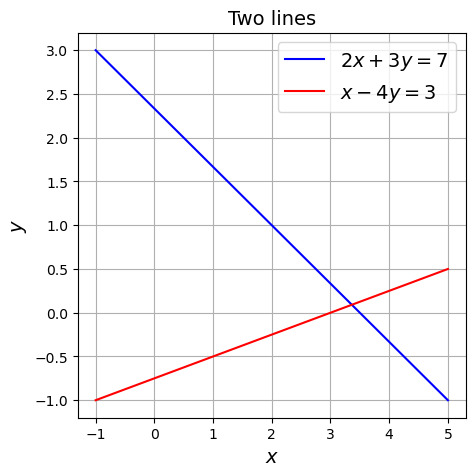

In [90]:
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')

ax1.legend(loc='best', fontsize=14)


The blue line maps out all combinations of $x$ and $y$ values that satisfy the first equation/constraint, and the red all the $x$ and $y$ values that satisfy the second.

So in solving the system of simultaneous equations, or equivalently solving the corresponding matrix system, we are asking the question what $x$ and $y$ values satisfy BOTH equations (or constraints)?


From the image above we see that **there is a solution** (at the intersection) and it is clearly **unique** (there is only one intersection), for these particular equations. This is the only combination of $x$ and $y$ values that satisfy BOTH equations/constraints.


In 2D for this example, one constraint restricts our 2D space of $x,y$ values to a 1D subset, the other to another 1D subset, combined they restrict the 2D space down to 0D, i.e. a single point - our unique solution.


But of course in 2D there are two other possible scenarios - what are these?  Can you construct suitable pairs of equations that demonstrate these possibilities, and the corresponding plots to help explain what is going in visually? 


.... see the exercises.

## Solving a general linear system

In this simple $2\times 2$ case we can find the solution via the above geometric method, or we can substitute one equation into the other to solve the system:

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3
\end{eqnarray*} 

Lots of ways we could do this, but as $x$ is already on its own in the second equation perhaps easiest (as it delays the need to deal with fractions) to rearrange and substitute $x=3+4y$ into the first:

$$ 2x + 3y = 7 \quad\implies\quad 2(3+4y)+3y=7 \quad\implies\quad  (2\times 4 + 3)y=7 - 2\times 3  \quad\implies\quad y = \frac{1}{11} $$

Then substitute this back into one of the equations to find $x$, again easiest option is the second:

$$x=3+4y = 3+4\times \frac{1}{11} = \frac{37}{11}$$

But we can't really use either of these approaches (plotting or substitution) if our system is much larger in dimension - what if we had billions of unknowns (which on today's computers are problem sizes we would certainly be wanting to solve.)

We can check our solution to the $2\times 2$ problem by adding this point we just derived to our plot and comfirm if it agrees with the intersection.

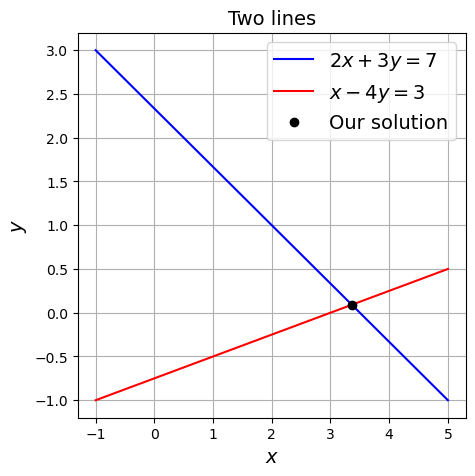

In [91]:
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')
ax1.plot(37./11,1./11, 'ko', label='Our solution')

ax1.legend(loc='best', fontsize=14)

Success!!

# Matrix inverse

For a square $n\times n$ matrix $A$, its inverse is defined as the matrix $B$ with the same dimensions as $A$ that satisfies

$$AB = BA = I$$

where $I$ is the identity matrix of size $n\times n$ (sometimes to explicitly indicate its dimension we would write $I_n$) - see a couple of cells below for the formal definition.

That is if we pre- or post-multiply $A$ by this matrix we get the identity matrix. 

<div class="optional">

**Aside:**

To understand this we need to recall what it means to multiple two matrices together. 

We'll go through this in detail in an optional section below rather than getting bogged down in the details here, for now we just state that mat-mat multiplication is just a straightforward extension of matrix-vector multiplication applied to each column of the matrix on the right of the pair:


$$C=AB \qquad \iff \qquad c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}$$

</div>

Such a matrix $B$, if its exists (more on this later), is called the inverse of $A$ and denoted $A^{-1}$. Note that  $(A^{-1})^{-1} = A$.

The action of taking the inverse can be written $\text{inv}(A)$, so for example $\text{inv}(\text{inv}(A)) = A$.

Note that since we established above that $AB \ne BA$ in general, then for non-square matrices it is certainly possible to find a matrix $B$ such that $AB=I$ but $BA\ne I$. In this case we say that $B$ is a *right inverse*. Similar definition for *left inverse*. 

For square matrices a left inverse is also the right inverse and vice-versa.

## Properties of the matrix inverse

If a matrix has an inverse, then that inverse is unique.

How could you prove a result like this:

consider a matrix $A$ and suppose $B$ and $C$ are both inverses, i.e.

$$AB = BA = I\quad\text{and}\quad AC = CA = I$$

then it must follow that

$$B = BI = B(AC) = (BA)C = IC = C$$

Hence the inverse is unique.

The following properties of inverses hold

For invertible matrices $A$ and $B$ (of the same square size) and scalar $\alpha\ne 0$


1. $\alpha A$ is invertible and $(\alpha A)^{-1} = \alpha^{-1} A^{-1}$


2. $AB$ is invertible and $(AB)^{-1} = B^{-1}A^{-1}$


3. $A^{-1}$ is invertible and $(A^{-1})^{-1}=A$


4. $A^{T}$ is invertible and $(A^{T})^{-1}=(A^{-1})^T$


As an exercise you can check these through some example using NumPy.

## Using the inverse matrix to solve a linear system

**IF** we have the inverse matrix, then to solve the matrix equation 

$$ A\boldsymbol{x}=\boldsymbol{b} $$

we can simply multiply both sides by the inverse of the matrix $A$:

\begin{align}
A\boldsymbol{x} & = \boldsymbol{b}\\
\implies A^{-1}A\boldsymbol{x} & = A^{-1}\boldsymbol{b}\\
\implies I\boldsymbol{x} & = A^{-1}\boldsymbol{b}\\
\implies \boldsymbol{x} & = A^{-1}\boldsymbol{b}
\end{align}

so we can find the solution $\boldsymbol{x}$ by multiplying the inverse of $A$ with the RHS vector $\boldsymbol{b}$.

### The inverse for our simple example

Note that for our $2\times 2$ case, when we went through the steps of substituting one equation into another to solve the system, this actually pretty much gave us enough information to write down the inverse matrix.

Let's check that we do indeed have an inverse:

In [92]:
# our matrix
A = np.array([[2, 3], [1, -4]])

# I claim this is the inverse to that matrix
B = (-1./11)*np.array([[-4, -3], [-1, 2]])

# let's check
print(A@B)
print(B@A)

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


<div class="optional">
    
### Row operations and a glimpse at Gaussian elimination [\* - please read through this in your own time]

What did we do when we used substitution to solve our problem

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}   
$$

We rearranged the second equation to yield $x=3+4y$ and substituted it into the first to obtain an equation that contained $y$'s only. 

We can achieve exactly the same thing if we subtract twice the second equation from the first: the $x$'s cancel, we get $3-2\times (-4)$ (i.e. 11) $y$'s on the LHS, and on the RHS we get $7-2\times 3$, i.e. 1.  

Hence, we have $11y=1$ and so $y=1/11$.

We effectively performed what are called **row operations** on the matrix and the RHS vector. Recalling that each row of the matrix encodes an algebraic equation, we can multiply each row by a non-zero scalar, add multiples of one row to another, and swap rows, without changing the overall information that the rows (or the corresponding equations) are telling us (as long as we remember that we must apply the same operation to the RHS value, otherwise the equation would change!).


<br>

**Row operations** are thus defined as


1. multiply each row by a non-zero scalar


2. add multiples of one row to another 


3. swap rows


<br>
<br>

For the example above, multiplying a row by a scalar or swapping rows would not change the two lines in the plot and so not change the solution.  Adding a multiple of one row to another and replacing one row with this updated row **will** change one of the lines, **but** the intersection point won't change - convince yourself of this with some additional plotting.
    
<br>
    
    
We can perform these operations in a way that is easy to keep track of by forming an **augmented matrix** (we add the RHS vector as an additional column). 

In this demonstration where we also want to form the inverse matrix let's additionally add columns corresponding to the inverse matrix. 

The notation above the arrows should hopefully be clear, it's encoding the operations we are performing on the rows, with '(1)' and '(2)' identifying the first and second row, respectively. '$(1)\leftarrow (1)-2(2)$' means replace the first row with the first row minus twice the second row - the operation we performed above.

When we perform these operations on the rows of the matrix $A$, we also apply them to the additional columns in our augmented matrix:

\begin{align*}
[A \, | \, \boldsymbol{b} \, | \, I] = 
&\left[
  \begin{array}{cc|c|cc}
    2 & 3 & 7 & 1 & 0 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)-2(2)}
\left[
  \begin{array}{cc|c|cc}
    0 & 11 & 1 & 1 & -2 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)/11}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]\\
&\xrightarrow{(2)\leftarrow (2)+4(1)}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  
  \end{array}
\right]
\xrightarrow{(1)\leftrightarrow (2)}
\left[
  \begin{array}{cc|c|cc}
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  \\
    0 & 1 & 1/11 & 1/11 & -2/11 
  \end{array}
\right]
\end{align*}

Now the fact that we have transformed $A$ into $I$ via these so-called *row operations* means that what was originally in the $\boldsymbol{b}$ position is now the solution $\boldsymbol{x}$, and what was originally $I$ is now $A^{-1}$:

$$\boldsymbol{x} =
\begin{pmatrix}
3+4/11\\
1/11
\end{pmatrix}=
\begin{pmatrix}
37/11\\
1/11
\end{pmatrix},$$

so this approach has indeed given us the correct solution to our original problem - it's vital that we also performed the same row operations on the RHS vector, hence considered the augmented matrix rather than the $A$ matrix alone.


<br>
<br>

In addition we have

$$A^{-1} = 
\begin{pmatrix}
    4/11 & 1-8/11  \\
    1/11 & -2/11 
\end{pmatrix}= 
\begin{pmatrix}
    4/11 & 3/11  \\
    1/11 & -2/11 
\end{pmatrix}= \frac{-1}{11}
\begin{pmatrix}
    -4 & -3  \\
    -1 & 2 
\end{pmatrix}
$$

which can also be checked for correctness.


<br>
<br>

A homework exercise asks you to repeat these steps to derive the inverse of the completely general $2\times 2$ matrix

$$A = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix}$$


<br>
<br>

These ideas (i.e. use of row operation to simplify the form of the linear system without changing its solution) underlies the Gaussian elimination and the LU decomposition algorithms.

</div>

### Solving our simple example using the inverse matrix

So we have enough information now to solve our problem

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}   
$$


Recalling the solution we calculated through substitution: $x=37/11$ and $y=1/11$, we can use to check our numerical solution.

Let's calculate 

$$\boldsymbol{x} = A^{-1}\boldsymbol{b}$$

In [93]:
# form the LHS matrix
A = np.array([[2., 3.], [1., -4.]])

# form the RHS vector
b = np.array([7., 3.])

# the inverse matrix from above:
invA = (-1./11)*np.array([[-4, -3], [-1, 2]])

# compute and print our solution
x = invA@b
print('x = ',x)

# Check our two numerical solutions using the numpy allclose function
print('\nOur computed solution solves the linear system (Ax == b): ', 
      np.allclose(A@x, b))

# and check further that this agrees with the solution we computed by hand
print('\nand agrees with the exact solution we computed by hand: ', 
      np.allclose(x, [37./11., 1./11.]))

x =  [3.363636 0.090909]

Our computed solution solves the linear system (Ax == b):  True

and agrees with the exact solution we computed by hand:  True


<div class="optional">

## Aside: constructing some useful simple matrices in NumPy [*]

Now is perhaps a good opportunity to review some more useful NumPy commands to construct certain common matrices.

[NB. Everything below can be extended to higher rank tensors]

</div>

<div class="optional">
    
### The identity matrix

The identity matrix $I$ (sometimes to indicate dimension we would write $I_n$ or even $I(n)$) is of size $n\times n$ and is zero everywhere except for the main diagonal where all entries are 1 (sometimes you will see people use the word unity).

</div>

In [94]:
# how to initialise the identity matrix, I or Id
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<div class="optional">

### Diagonal matrices

Diagonal matrices are very useful and occur a lot.

The command `numpy.diag` can be used to both extract diagonals from matrices, and to place vectors in place on the diagonals of matrices.

For example:

</div>

In [95]:
# extract a diagonal of given a matrix (2D array)
print(np.diag(np.eye(3)))
# the default is to extract the leading diagonal (k=0)
print('\n',np.diag(np.eye(3),k=0))
# can also extract off diagonals with positive/negative integer k's:
print('\n',np.diag(np.eye(3),k=1))

[1. 1. 1.]

 [1. 1. 1.]

 [0. 0.]


In [96]:
# given a 1D array diag constructs a 2D array:
print(np.diag(np.array([1,2,3])))
# again default is to place on the leading diagonal, but we can specify other diagonals:
print('\n',np.diag(np.array([1,2,3]), k=-1))

[[1 0 0]
 [0 2 0]
 [0 0 3]]

 [[0 0 0 0]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]]


<div class="optional">

### Matrices of zeros or ones, empty matrices

The matrix $\boldsymbol{0}$ made up of zero entries is termed the zero matrix or the null matrix.

Mathematically, we will see it's use when we talk about eigenvalues next lecture, as well as null spaces.

Computationally, we will often initialise an array or matrix to zero if we subsequently perform operations which add entries to it.

</div>

In [97]:
# how to initialise a vector of zeros 
print(np.zeros(3))
# vector of zeros of length the same as number of rows in A
A = np.array([[2, 3], [1, -4]])
print('\n', np.zeros(np.shape(A)[0]))
# matrix of zeros of length the same shape as A
print('\n', np.zeros_like(A))

[0. 0. 0.]

 [0. 0.]

 [[0 0]
 [0 0]]


In [98]:
# how to initialise a matrix of zeros
print(np.zeros((3,3)))

# also

#print('\n', np.zeros(np.shape(A)))
#print('\n', np.zeros_like(A))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [99]:
# how to initialise a 3rd-order tensor of zeros
print(np.zeros((3,3,3)))

print(np.size(np.zeros((3,3,3))))

print(np.shape(np.zeros((3,3,3))))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
27
(3, 3, 3)


<div class="optional">
    
Initialising an array or matrix to have all entries one (unity) is useful if we subsequently apply multiplicative operations on its entries.

</div>

In [100]:
# how to initialise a vector of ones 
print(np.ones(3))
print('\n',np.ones((3,3)))
# A matrix of ones, the same size as A
A = np.array([[2, 3], [1, -4]])
print('\n', np.ones_like(A))

[1. 1. 1.]

 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

 [[1 1]
 [1 1]]


In [101]:
# if you don't care about initialise to zero you can use
print('\n', np.empty(3))
# but the entries will be random

# (they might appear as zeros but you can't guarantee this)
# as you're not setting values on initialisation this will be
# slightly faster - but not enough to really warrant use in this course.


 [1. 1. 1.]


# The determinant 

So for linear systems (and next lecture we will see also for eigenvalues), we need a method to determine whether a given matrix is invertible or not - the determinant of the matrix tells us this.

The [*determinant*](https://en.wikipedia.org/wiki/Determinant) is a quantity of a square matrix which can be computed directly from its entries.

It can be written as either $\det(A)$ or $|A|$.

Geometrically it gives the scaling of the volume (area in 2D) of a shape under the linear transformation represented by the matrix - proved at the end, and more on linear transformations next lecture. 

If the mapped volume has zero volume, how does this fact alone tell you that the matrix can't have an inverse?

[since zero volume in the mapping implies that (at least) two distinct points are mapped to the same point - we therefore do not have a well-defined inverse].

Consider the matrix

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6  \\
  \end{array}
\right),
$$

for a $2 \times 2$ matrix we can compute the determinant in our heads (or with a calculator!) - we multiply the two main diagonal entries and subtract the multiple of the off-diagonal entries:

$$\det(A) = (2\times 6) - (3\times 4) = 0$$

Let's check this using a SciPy function for computing determinants:

In [102]:
A = np.array( [[2, 3], [4, 6] ] )
print(sl.det(A))
print(np.allclose(0,sl.det(A)))

-6.661338147750939e-16
True


In [103]:
# and for our linear system example above:
A = np.array([[2, 3], [1, -4]])
print(sl.det(A))

-11.0


The former determinant is zero (to round off) and this means that the corresponding matrix does not have an inverse, 

the latter is safely non-zero and hence is why we were able to find the inverse without problem.

We'll review the general formula for the determinant later.

A homework exercise includes writing our own function to compute the determinant of a general matrix.

<div class="optional">

# Matrix-vector multiplication (again; code speed) [\*]

Let's go back to our matrix vector multiplication code to test our calculation above, and we will also think about speed!

</div>

In [104]:
# copied from above

def mat_vec_product(A, x):
    """ Return the matrix vector product Ax
    """
    m, n = np.shape(A)
    assert x.ndim == 1 # restrict to the case where x is 1D
    assert n == len(x) # as 1D we can check the length of x is consistent with A
    b = np.zeros(m) # and then initialise the appropriate length array for b
    for i in range(m):
        for j in range(n):
            b[i] += A[i, j] * x[j]
    return b

<div class="optional">

## Testing our code 

Let's test our code by comparing it against our case from above.

</div>

In [105]:
# our LHS matrix
A = np.array([[2., 3.], [1., -4.]])
# our RHS vector
b = np.array([7., 3.])
# the solution we calculated
x = np.array([37./11., 1./11.])

# first let's check that Ax = b using NumPy's matrix-vector multiplication
print('Ax=b (NumPy): ',np.allclose(A@x, b))

# and with our function
print('Ax=b (mat_vec_product): ',np.allclose(mat_vec_product(A,x), b))


Ax=b (NumPy):  True
Ax=b (mat_vec_product):  True


<div class="optional">

## Checking the speed of our code!

Let's check how efficient out code is compared to NumPy - as mentioned above `@` and `np.dot` are two in-built methods to perform matrix multiplication, let's consider both to see if there's any difference between them.

</div>

In [106]:
A = np.array([[2., 3.], [1., -4.]])
x = np.array([37./11., 1./11.])

time_at = %timeit -o b=A@x  
time_dot = %timeit -o b=A.dot(x)
time_ours = %timeit -o b=mat_vec_product(A, x)

# if you wanted to control number of calls to reduce time use something like: %timeit -n 10 -r 3 -o b=A@x

print(time_at.best, time_dot.best, time_ours.best, time_ours.best/time_at.best)

586 ns ± 2.83 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
280 ns ± 1.46 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.73 µs ± 11.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
5.8049469999969e-07 2.784686000086367e-07 1.7083745999261737e-06 2.9429633034153215


<div class="optional">

So for our $2\times 2$ example we're slower, but not disastrously.

Let's try a larger example using some matrices made up of random entries.

</div>

In [107]:
# just some random numbers, doesn't need to be square for this demo
m = 1234
n = 1498
# a random (dense) matrix and vector
A = np.random.random((m,n))
x = np.random.random((n))

print('A @ x = mat_vec_product(A, x):  ', np.allclose(A@x , mat_vec_product(A, x)))

time_at = %timeit -n 10 -r 3 -o b=A@x
time_dot = %timeit -n 10 -r 3 -o b=A.dot(x)
time_ours = %timeit -n 10 -r 3 -o b=mat_vec_product(A, x)

print(time_at.best, time_dot.best, time_ours.best, time_ours.best/time_at.best)

A @ x = mat_vec_product(A, x):   True
234 µs ± 112 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
162 µs ± 30.7 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
404 ms ± 455 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
0.00014627999626100064 0.00013944997917860746 0.40412958001252264 2762.7125399391784


<div class="optional">

Oh dear. A lot slower!

More on this in the exercises.

</div>

<div class="optional">

# Matrix-matrix product [*]

To test whether or not we have a matrix that is an inverse we need to know how to perform matrix-matrix multiplication in order to check, and to make use of the inverse to solve the corresponding linear system.

This is just a straightforward extension of matrix-vector multiplication applied to each column of the right-hand matrix.

</div>

<div class="optional">

The matrix-matrix product 

$$C=AB$$

is defined by 

$$c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}$$

If you're familiar with [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation) we can also write

$$c_{ij} = a_{ik} b_{kj}$$

we have contracted over the inner-most index - this is why the convention to say "m by n" makes sense.

</div>

<div class="optional">

## Conformable dimensions

Note that matrix multiplication needs to be conducted between matrices which are [*conformable*](https://en.wikipedia.org/wiki/Conformable_matrix) for multiplication.

For matrix-vector multiplication this meant we needed the same number of columns in the matrix as entires in the vector, and the result was a new vector with the same number of rows as the matrix, we could write this as:

$$ (m \times n) \times (n \times 1) = (m \times 1) $$

For the general matrix-matrix case this requirement can be illustrated as

$$ (m \times n) \times (n \times p) = (m \times p) $$

and so in the mathematics above, $1\leq i \leq m$ and $1\leq j \leq p$, while $1\leq k \leq n$.

</div>

<div class="optional">

## Properties

Matrix-matrix multiplication satisfies the properties:


1. $A(B + C) = AB + AC$ - this is termed the *distributive* property - matrix multiplication is distributive


2. $AB \neq BA$, in general - matrix multiplication is not commutative


3. $A(BC) = (AB)C$,  assuming consistent matrix dimensions - matrix multiplication is associative


4. $A (cB) = c AB$,  for scalars $\alpha$ - you can pull scalar factors out

</div>

<div class="optional">

## Code

We can code this up quite easily.

</div>

In [108]:
def mat_mat_product(A, B):
    """ Return the matrix matrix product AB
    """
    m, n1 = np.shape(A)
    n2, p = np.shape(B)
    assert n1==n2 
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n1):
                C[i, j] += A[i, k] * B[k, j]
    return C

<div class="optional">

### Testing our code

</div>

In [109]:
# define some random matrices
m = 10
n = 10
p = 10
A = np.random.random((m, n))
B = np.random.random((n, p))
C = np.random.random((n, p))
alpha = np.random.random((1,))
print('our code agree with @:', np.allclose(mat_mat_product(A, B), A@B))
print('A(B+C)==AB+AC: ',np.allclose(mat_mat_product(A, (B + C)), mat_mat_product(A, B) + mat_mat_product(A, C)))
print('A(alpha B)==alpha AB: ', np.allclose(mat_mat_product(A, alpha * B), alpha*mat_mat_product(A, B)))
print('AB==BA: ',np.allclose(mat_mat_product(A, B), mat_mat_product(B, A)))

our code agree with @: True
A(B+C)==AB+AC:  True
A(alpha B)==alpha AB:  True
AB==BA:  False


In [110]:
# define some random matrices
m = 10
n = 9
p = 8
A = np.random.random((m, n))
B = np.random.random((n, p))
C = np.random.random((n, p))
alpha = np.random.random((1,))
print('our code agree with @:', np.allclose(mat_mat_product(A, B), A@B))
print('A(B+C)==AB+AC: ',np.allclose(mat_mat_product(A, (B + C)), mat_mat_product(A, B) + mat_mat_product(A, C)))
print('A(alpha B)==alpha AB: ', np.allclose(mat_mat_product(A, alpha * B), alpha*mat_mat_product(A, B)))
print('AB==BA: ',np.allclose(mat_mat_product(A, B), mat_mat_product(B, A)))

our code agree with @: True
A(B+C)==AB+AC:  True
A(alpha B)==alpha AB:  True


AssertionError: 

<div class="optional">

Of course $AB=BA$ certainly can't be true if $A$ and $B$ are not square matrices!

When they are square only certain matrices have this property. Those that do are said to [commute](https://en.wikipedia.org/wiki/Commuting_matrices).

</div>

In [111]:
# For our linear system case from above, actually in solving the system we basically did enough work
# to figure out what the inverse matrix is:
A = np.array([[2, 3], [1, -4]])
B = (-1./11)*np.array([[-4, -3], [-1, 2]])
print(mat_mat_product(A,B))
print(mat_mat_product(B,A))

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [112]:
# define some random matrices
n = 3
A = np.random.random((n, n))
B = np.random.random((n, n))
print(A@B)
print(B@A)
print("A@B==B@A :",np.allclose(A@B,B@A))

[[1.350947 0.846931 0.641134]
 [0.775044 1.440564 1.10829 ]
 [0.515397 0.940465 0.823206]]
[[1.058658 1.220193 0.955587]
 [0.893735 1.696765 0.477904]
 [0.636057 0.524616 0.859293]]
A@B==B@A : False


# Some linear algebra theory

## The determinant (again)

Let's return to the [*determinant*](https://en.wikipedia.org/wiki/Determinant). 

As said earlier, geometrically it gives the scaling of the volume of a shape under the linear transformation represented by the matrix,

and it tells us whether or not an inverse matrix exits.

### Properties

1. For square, equal size matrices $|AB| = |A|\,|B|$


2. $|A^T| = |A|$


3. $|\alpha A| = \alpha^n |A|$, where $n$ is the dimension of the square matrix $A$


4. If any row (or column) is made up of zero entries only, then the determinant of that matrix is zero


5. [NB. Eigenvalues introduced next lecture] The determinant is equal to the product of the eigenvalues of the matrix (where we need to multiply multiple times if an eigenvalue has an algebraic multiplicity greater than one) - so a determinant of zero is equivalent to having at least one zero eigenvalue!


6. For an upper or lower triangular matrix, the determinant is equal to the product of the main diagonal entries (as the eigenvalues in this case are the diagonal entries!)


<br>

Exercise: you can check that all of these seem to be true through considering some concrete examples.

<div class="optional">

### Full definition [*]

The general formula for computing the determinant of a square matrix can be built up incrementally (or recursively) based on matrix size as follows:


1. For a $1 \times 1$ matrix $A = a_{11}$ the determinant is defined simply as $|A| = a_{11}$

<br>

2. For a $2 \times 2$ matrix 

$$A = 
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
$$

the determinant is defined as $|A| = a_{11}a_{22} - a_{12}a_{21}$

where it helps for the following steps if you interpret these 4 scalars as the determinants of 4 $1\times 1$ matrices.
    
</div>

In [113]:
# Let's check our maths!
A = np.array([[2., 3.], [4., 6.]])
print('det(A) = ', sl.det(A))
print('\nMarix A is singular: ', np.isclose(sl.det(A), 0.))

det(A) =  -6.661338147750939e-16

Marix A is singular:  True


<div class="optional">

3. For a $3 \times 3$ matrix 

$$A = 
\begin{pmatrix}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}\\
    a_{31} & a_{32} & a_{33}\\
\end{pmatrix}
$$

the determinant can be computed as


$$ |A| = 
a_{11}
\begin{vmatrix}
    a_{22} & a_{23}\\
    a_{32} & a_{33}
\end{vmatrix}
- a_{12}
\begin{vmatrix}
    a_{21} & a_{23}\\
    a_{31} & a_{33}
\end{vmatrix}
+ a_{13}
\begin{vmatrix}
    a_{21} & a_{22}\\
    a_{31} & a_{32}
\end{vmatrix}
$$

In this expression, the first term includes
$$
\begin{vmatrix}
    a_{22} & a_{23}\\
    a_{32} & a_{33}
\end{vmatrix}
$$ 

which is the determinant of the $2\times 2$ matrix you get from $A$ if you omit the row and column in which the multiplier in front of this contribution (i.e. the first entry of the first row $a_{11}$) lies. 

The second term has a similar $2\times 2$ determinant that comes from omitting the row and column in which the multiplier $a_{12}$ lies.  Note that we have a minus sign in front of this term.

The third term is analogous, but now with a plus sign again. 

This is what is called the *(cofactor) expansion of the determinant from the first row*.  We get the same answer (and hence alternative computation methods that may involve less work if there are an excess of zeros on certain rows or columns!) but expanding using any row, or indeed any column.

We just need to remember that the signs (pluses or minuses) in front of every term follow a chess-board pattern:

$$
\begin{pmatrix}
    + & - & + & \cdots \\
    - & + & - & \cdots \\
    + & - & + & \cdots \\
    \vdots & \vdots & \vdots  & \ddots
\end{pmatrix}
$$

We define the appropriately signed $2\times 2$ determinant the [*cofactor*](https://en.wikipedia.org/wiki/Minor_(linear_algebra)) of the multiplier $a_{ij}$, and denote it by $C_{ij}$, e.g.

$$C_{11} = 
\begin{vmatrix}
    a_{22} & a_{23}\\
    a_{32} & a_{33}
\end{vmatrix}, 
\quad
C_{12} = -
\begin{vmatrix}
    a_{21} & a_{23}\\
    a_{31} & a_{33}
\end{vmatrix}
$$

[If you drop the sign and just keep the determinant, the quantity is called the [*minor*](https://en.wikipedia.org/wiki/Minor_(linear_algebra)#First_minors) sometimes denoted $M_{ij}$.]


We can thus define the determinant in terms of an [expansion of cofactors](https://en.wikipedia.org/wiki/Minor_(linear_algebra)#Cofactor_expansion_of_the_determinant):

$$|A| = a_{11} C_{11} + a_{12} C_{12} + a_{13} C_{13}$$ 

with alternative definitions of the determinant given by 

$$|A| = a_{31} C_{31} + a_{32} C_{32} + a_{33} C_{33}$$ 

or an example of expanding over a column

$$|A| = a_{12} C_{12} + a_{22} C_{22} + a_{32} C_{32}$$ 

etc.

</div>

In [114]:
# can you do this one in your head?
A = np.array([[0, 1, 0], [1, 2, 3], [4, 5, 6]])
print('A = ')
print(A)

A = 
[[0 1 0]
 [1 2 3]
 [4 5 6]]


In [115]:
print('det(A) = ', sl.det(A))

det(A) =  6.0


<div class="optional">

4. For an $n \times n$ matrix 

**This gives us a general algorithm for computing the determinant of an arbitrary sized square matrix in terms of determinants of smaller matrices, each of which can themselves be computed in terms of determinants of even smaller matrices.** 


We can perform this expansion recursively, down to our above expression for the
determinant of a $2\times 2$ matrix, or indeed a $1\times 1$ - note that the above general expression is consistent with our expression for the $2\times 2$ case we wrote down explicitly above.


The matrix of cofactors is the same size as $A$ and is called the *cofactor matrix*:

$$C = 
\begin{pmatrix}
    C_{11} & C_{12} & \cdots\\
    C_{21} & C_{22} & \cdots\\
    \vdots & \vdots & \ddots\\
\end{pmatrix}
$$ 

and its transpose we call the adjugate or [*adjugate matrix*](https://en.wikipedia.org/wiki/Adjugate_matrix):

$$\text{adj}(A) = C^T$$


<br>
<br>
    
A **homework exercise** includes writing our own function to compute the determinant of a general matrix using the above recursive ideas.

</div>

## The inverse matrix

The existence of an inverse to a matrix is equivalent to whether or not that matrix's determinant is zero or not.

If the determinant is non-zero then it does have an inverse.

As a $1\times 1$ matrix is a scalar, defining its inverse is trivial.

### $2\times 2$ case

In the $2\times 2$ case we can write down a simple formula for the inverse:

For a matrix $A$ with entries

$$A = 
\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}$$

if $|A|\ne 0$, i.e. $ad-bc\ne 0$, then

$$A^{-1} = \frac{1}{|A|}
\begin{pmatrix}
    d & -b\\
    -c & a
\end{pmatrix}$$

Deriving this expression is a homework exercise.

Let's verify this with an example:

In [116]:
A = np.array([[2., 3.], [1., -4.]])
a = A[0,0]
b = A[0,1]
c = A[1,0]
d = A[1,1]
B = (1./(a*d - b*c)) * np.array([[d, -b], [-c, a]])
print(B)
print(A@B)
print(B@A)

[[ 0.363636  0.272727]
 [ 0.090909 -0.181818]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


So for this example this formula does indeed give us a matrix $B$ such that 
$AB = BA = I$.

### $n\times n$ case

A general formula for the inverse of a square, invertible matrix is (<https://en.wikipedia.org/wiki/Invertible_matrix#Analytic_solution>):

$$A^{-1} = \frac{1}{|A|}\text{adj}(A),$$


where $\text{adj}(A)$ is the adjugate matrix defined in the optional section above.

Note that this is consistent with the $2 \times 2$ case above.

We will demonstrate/prove this in the homework exercise on "Cramer's Rule".  

## Using SciPy to compute the inverse matrix

A quick review of some useful SciPy/NumPy functions.

Let's try a $3\times 3$ example.

In [117]:
A = np.array([[10., 2., 1.],
                 [6., 5., 4.],
                 [1., 4., 7.]])

# the inverse of the matrix A - computed using a scipy algorithm
print(sl.inv(A))

# or via numpy
print('\n', np.linalg.inv(A))

# see https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
# for comments on scipy.linalg vs numpy.linalg

# sl.inv?  # uncomment this command to display docs on this function

# the determinant of the matrix A
print(sl.det(A))

# OR
print('\n', np.linalg.det(A))

# it sometimes makes our life a bit easier if we don't always print out all 
# significant figures. We can do this in notebooks with 
%precision 4

# Multiply A with its inverse using numpy's dot. Note that due to
# roundoff errors the off diagonal values are not exactly zero.
pprint(np.dot(A,sl.inv(A)))

# print a blank line just to make output easier to read
print('\n')

# check the result with the @ operator as well
pprint(A @ sl.inv(A))

# use allclose to confirm this is indeed the identity (to round-off)
print('\n', np.allclose(A @ sl.inv(A), np.eye(np.shape(A)[0])))


# three ways to achieve the same thing
pprint(np.dot(A,sl.inv(A)))
print('\n')
pprint(A.dot(sl.inv(A)))
print('\n')
pprint(A @ sl.inv(A))
print('\n')

# and how not to do it.
print(A*sl.inv(A))
# note that the * operator simply does operations "element-wise"
# which is not the same thing as matrix-matrix multiplication
# (so * in numpy is the same as ".*" in matlab)

[[ 0.142857 -0.075188  0.022556]
 [-0.285714  0.518797 -0.255639]
 [ 0.142857 -0.285714  0.285714]]

 [[ 0.142857 -0.075188  0.022556]
 [-0.285714  0.518797 -0.255639]
 [ 0.142857 -0.285714  0.285714]]
133.00000000000003

 133.0
array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
       [-2.2204e-16,  1.0000e+00,  2.2204e-16],
       [-8.3267e-17, -1.1102e-16,  1.0000e+00]])


array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
       [-2.2204e-16,  1.0000e+00,  2.2204e-16],
       [-8.3267e-17, -1.1102e-16,  1.0000e+00]])

 True
array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
       [-2.2204e-16,  1.0000e+00,  2.2204e-16],
       [-8.3267e-17, -1.1102e-16,  1.0000e+00]])


array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
       [-2.2204e-16,  1.0000e+00,  2.2204e-16],
       [-8.3267e-17, -1.1102e-16,  1.0000e+00]])


array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00],
       [-2.2204e-16,  1.0000e+00,  2.2204e-16],
       [-8.3267e-17, -1.1102e-16,  1.0000e+00]])


[[ 1.4286 -0.1504  0.0226]
 [-1

We can ignore the very small numbers which are due to floating point round-off errors - `np.allclose` can be used to confirm that these are indeed the identity matrix.

## Singular matrices

If $|A|=0$ then $A$ is termed a [*singular matrix*](http://mathworld.wolfram.com/SingularMatrix.html) and it does not have an inverse.


In [118]:
# example from above
A = np.array([[2., 3.], [4., 6.]])
print('Marix A is singular: ', np.isclose(sl.det(A), 0.))

Marix A is singular:  True


What happens if we try to use SciPy to compute the inverse of a matrix with a zero (or very small) determinant?

In [119]:
sl.inv(A)

LinAlgError: singular matrix

In [120]:
np.linalg.inv(A)

LinAlgError: Singular matrix

Remember - read the error message!

## Solvability of linear systems

<br>

*Things get more complicated here. If you've skipped most of sections 1-7 before starting section 8, it worth you quickly going through sections 2.6 and 3 at this point.*

<br><br>

If $\det(A)=0$ ($A$ is singular) a linear system featuring the matrix $A$ with any RHS does **not** have a **unique** solution, it **may have either infinite *or* no solutions**.

For example, consider

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

where the matrix on the LHS clearly has a zero determinant.

Considering now the values in the RHS vector as well, the second equation is simply twice the first, and hence a solution to the first equation is also automatically a solution to the second equation.  In this case as the equations do not contradict one another we say that the equations are **consistent**.

If we think geometrically, and interpret the two equations as constraints, they are **both** constraining our $x,y$ values to the same 1D subspace - any solution along this line in 2D satisfies **both** equations, and hence any of them is a solution to our linear system.

We hence only have one *linearly-independent* equation here, and our problem is under-constrained: we effectively only have one equation for two unknowns and this problem has *infinitely many* possibly solutions (or said another way, we have *existence*, but *non-uniqueness*): e.g. $\boldsymbol{x}=(2,0)^T$ is a solution, so is $\boldsymbol{x}=(-1,2)^T$, etc.


<br>

If we instead replaced the RHS vector with $(4,7)^T$, then the two equations would now be contradictory: in this case we have *no solutions* (or *non-existence*).


### Linear (in)dependence

Note that a set of vectors where one can be written as a linear sum of the others are termed [***linearly-dependent***](https://en.wikipedia.org/wiki/Linear_independence). 

(As was the case for the rows and the columns in the example immediately above - the first row of $A$ is simply twice the second; the second column is $3/2$ times the first).

<br>

When this is **not** the case the vectors are termed [***linearly-independent***](https://en.wikipedia.org/wiki/Linear_independence).

<br>

When the rows are linearly dependent what can you conclude about the expected structure of the [***row echelon form***](https://en.wikipedia.org/wiki/Row_echelon_form) of the matrix? I.e. what do you expect to end up if you add and subtract multiples of rows to other rows in order to simplify the matrix? ............ [it's possible for us to obtain a row made up of all zeros!]


### A basis for a vector space

A <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a> for a vector (or linear) space is a set of *linearly-independent* vectors such that every vector (or location) in the vector space is a linear combination of this set.

<br>

[This a [goldilocks](https://en.wikipedia.org/wiki/Goldilocks_and_the_Three_Bears) like definition - we have exactly the right number of vectors - too few and we can't reach every point in the space through their combination, and too many some will be redundant and the set of vectors will be linearly dependent.]

<br>

The number of vectors in this set is called the **dimension** of the vector space.

For example, the unit vectors $\,\boldsymbol{i}$, $\boldsymbol{j}$, $\boldsymbol{k}\,$ are linearly-independent and form a basis for the [three-dimensional space $\mathbb{R}^3$](https://en.wikipedia.org/wiki/Three-dimensional_space). These unit vectors are defined as

$$\boldsymbol{i} = \left(
  \begin{array}{c}
    1 \\
    0 \\
    0     
  \end{array}
\right),
\;\;\;\;\;\;\;\;
\boldsymbol{j} = \left(
  \begin{array}{c}
    0 \\
    1 \\
    0     
  \end{array}
\right),
\;\;\;\;\;\;\;\;
\boldsymbol{k} = \left(
  \begin{array}{c}
    0 \\
    0 \\
    1     
  \end{array}
\right).
$$

By definition, these three vectors **forming a basis means that we can reach any point in $\mathbb{R}^3$ through summing appropriate multiples of them**.

These are the basis vectors which we commonly choose (as they're in some sense the simplest and cleanest choice), but clearly they are not unique - with any linearly independent set of three vectors we can reach any point in 3D space through their weighted summation - start thinking about these basis vectors being columns of a matrix forming a linear system!

### An example | the geometrical interpretation of matrix vector multiplication

Consider our $2\times 2$ example from earlier


$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}   
$$

If we define two vectors given by the columns of the matrix, which we plot below in blue and red, 

along with the point $\boldsymbol{b}$ we want to arrive at,


we can then visualise the problem of solving the linear system as wanting to reach the black point through the appropriate weighted sum of the blue and red vectors.  Why is this?


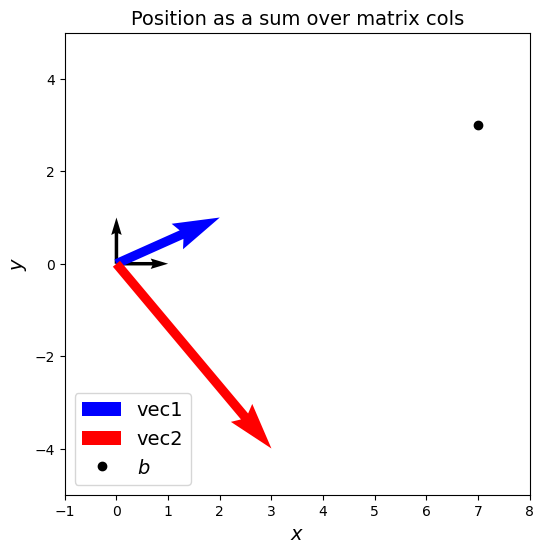

In [121]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Position as a sum over matrix cols', fontsize=14)
#ax1.grid(True)

i = np.array([1,0])
j = np.array([0,1])

# plot the unit vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='k')
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='k')

ax1.set_xlim(-1,8)
ax1.set_ylim(-5,5)

A = np.array([[2, 3], [1, -4]])
vec1 = A[:,0] # NB. This is the same as A*x
vec2 = A[:,1] # NB. This is the same as A*y

# plot them
ax1.quiver(vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.02,  label='vec1')
ax1.quiver(vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.02,  label='vec2')

# add point b
b = np.array([7., 3.])
ax1.plot(b[0], b[1], 'ko',  label='${b}$')

ax1.legend(loc='lower left', fontsize=14)

As already stated, we know trivially how to write the position $\boldsymbol{b}$ as a sum over the unit vectors $\boldsymbol{i}$ and $\boldsymbol{j}$ (the black vectors indicate the unit vectors $\boldsymbol{i}$ and $\boldsymbol{j}$ in the plot above):

$$\boldsymbol{b} = 
\begin{pmatrix}
b_1\\
b_2
\end{pmatrix} =
\begin{pmatrix}
b_1\\
0
\end{pmatrix} +
\begin{pmatrix}
0\\
b_2
\end{pmatrix} =
b_1\begin{pmatrix}
1\\
0
\end{pmatrix} + b_2
\begin{pmatrix}
0\\
1
\end{pmatrix} =
b_1 \boldsymbol{i} + b_2\boldsymbol{j}
$$

Finding the solution to our linear system is equivalent to asking how far along direction given by column one (blue vector), and then how far along the direction given by column two (the red vector), do I need to go to arrive at point $\boldsymbol{b}$.

This is exactly what the following interpretation of matrix-vector multiplication is telling us

$$ A \boldsymbol{x}=\boldsymbol{b} \quad \iff \quad
\begin{pmatrix}
    b_1\\
    b_2\\
    \vdots\\
    b_m
\end{pmatrix}
=
\begin{pmatrix}
      &     &         &     \\
      &     &         &     \\      
  \boldsymbol{a}_{\,:1} & \boldsymbol{a}_{\,:2} &  \ldots & \boldsymbol{a}_{\,:n} \\
      &     &         &     \\
      &     &         &     
\end{pmatrix}
\begin{pmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{pmatrix}
=
x_1 
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:1} \\
       \\
    ~   
\end{pmatrix}
+
x_2 
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:2} \\
       \\
    ~   
\end{pmatrix}
+ \cdots +
x_n
\begin{pmatrix}
       \\
       \\
   \boldsymbol{a}_{\,:n} \\
       \\
    ~   
\end{pmatrix}
$$


or in our case

$$ 
\begin{pmatrix}
    7\\
    3
\end{pmatrix}
=
\begin{pmatrix}
      2 & 3   \\
     1  & -4    
\end{pmatrix}
\begin{pmatrix}
    x_1\\
    x_2
\end{pmatrix}
=
x_1 
\begin{pmatrix}
       2 \\
       1
\end{pmatrix}
+
x_2 
\begin{pmatrix}
     3 \\
     -4
\end{pmatrix}
$$

<br>

We can use the solution $\boldsymbol{x}$ we have already found (`x = np.array([37./11, 1./11])`) to emphasise this visually/geometrically: 


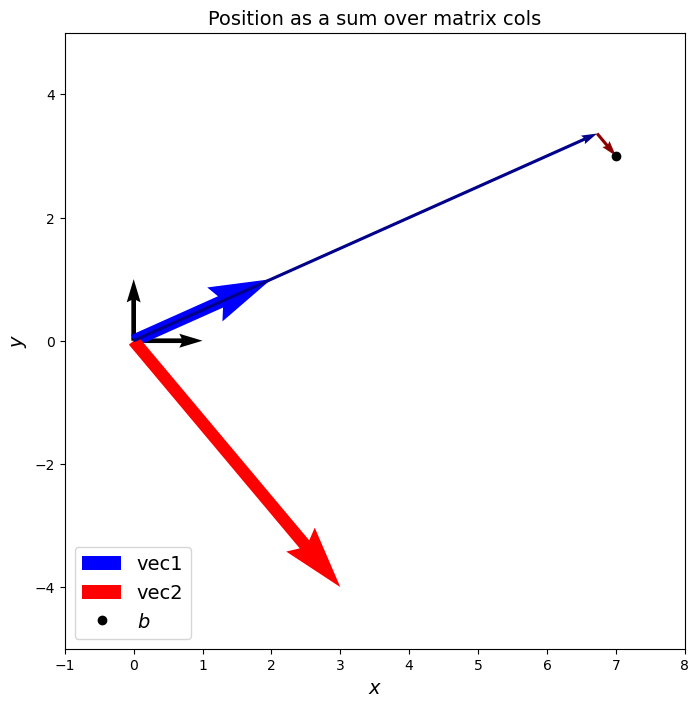

In [122]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Position as a sum over matrix cols', fontsize=14)
#ax1.grid(True)

i = np.array([1,0])
j = np.array([0,1])

# plot the unit vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='k')
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='k')


ax1.set_xlim(-1,8)
ax1.set_ylim(-5,5)

A = np.array([[2, 3], [1, -4]])
vec1 = A[:,0] # NB. This is the same as A*x
vec2 = A[:,1] # NB. This is the same as A*y

# plot them
ax1.quiver(vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.02,  label='vec1')
ax1.quiver(vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.02,  label='vec2')

# add point b
b = np.array([7., 3.])
ax1.plot(b[0], b[1], 'ko',  label='${b}$')

ax1.legend(loc='lower left', fontsize=14)

# Now move x_1 in the direction given by column one, followed by x_2 in the direction given by column 2
# and add to the plot with thinner lines
x = np.array([37./11, 1./11])
ax1.quiver(x[0]*vec1[0], x[0]*vec1[1], angles='xy', scale_units='xy', scale=1, color='darkblue', width=0.005,  label='vec1')
ax1.quiver(x[0]*vec1[0], x[0]*vec1[1],x[1]*vec2[0], x[1]*vec2[1], angles='xy', 
           scale_units='xy', scale=1, color='darkred', width=0.005,  label='vec2')

So we need to take 37/11 multiplied by the blue arrow and add 1/11 multiplied by the red arrow to reach the black dot.

[Note we don't say something like "move 37/11 in the direction of the blue arrow, as we might with i,j,k, since these vectors are not normalised"].

Note that the columns are not orthogonal in this case, which we can demonstrate by:

In [123]:
print(vec1.dot(vec2))

2


if they were orthogonal the answer should have been zero,

but that's fine as we can still reach any position in 2D space from their weighted sum as long as they are linearly independent, i.e. in the 2D case as long as they don't point in the same direction.

### Solvability theory - some equivalent properties


The following properties of a square $n\times n$ matrix are equivalent:



* $\det(A)\ne 0$, i.e. $A$ is non-singular.



* The columns of $A$ are linearly independent.


* The rows of $A$ are linearly independent.


* The columns of $A$ [*span*](https://en.wikipedia.org/wiki/Linear_span) an $n$-dimensional space (this means that we can reach any point in $\mathbb{R}^n$ through a linear combination of these vectors - recall we saw previously that this is simply what the operation $A\boldsymbol{x}$ is doing if you write it out - the entries of $\boldsymbol{x}$ are the weights in the linear combination - we wrote this out explicitly above.)  


* [what this means is that for **any** given point in our space (described for example by a given $\boldsymbol{b}$), we can reach that point through the appropriate summation of multiples of the columns of $A$, and its the $\boldsymbol{x}$ solution vector that gives us these multiples - see example above.]


* $A$ is invertible, i.e. there exists a matrix $A^{-1}$ such that $A^{-1}A = A A^{-1}=I$.


* The matrix system $A\boldsymbol{x}=\boldsymbol{b}$ has a unique solution for every vector $\boldsymbol{b}$.


<br>

Note that the above equivalencies can all be established from an abstract mathematical perspectrive, but also the majority can be largely seen to follow from the geometrical interpretations that we've been going through.

<br>

For even more equivalent properties for square matrices see <https://en.wikipedia.org/wiki/Invertible_matrix#The_invertible_matrix_theorem>.


<div class="optional">
    
### Rank, range and null-Space [\* - please read through these definitons in your own time - important concepts, but can be skipped if you're struggling]

Above we wrote for a square $n\times n$ matrix, that being non-singular (and hence the linear system having a unique solution for any RHS vector) is equivalent to

<br>

* The columns of $A$ [*span*](https://en.wikipedia.org/wiki/Linear_span) an $n$-dimensional space (this means that we can reach any point in $\mathbb{R}^n$ through a linear combination of these vectors - note that this is simply what the operation $A\boldsymbol{x}$ is doing of course if you write it out - the entries of $\boldsymbol{x}$ are the weights in the linear combination!)  

<br>

The columns of $A$ will always span an $r$-dimensional space, for some $r$, and assuming the matrix isn't the zero matrix $r \ge 1$. 

What we're saying in the statement above is that *if the columns of $A$ span an $n$-dimensional space* (i.e. if $r=n$) then ... all the other properties in the previous cell hold.

<br>

#### Rank

Let's explain a bit better what this means.

The ***rank*** of an $n\times n$ matrix $A$, written $\text{rank}(A)$, is equal to the number of linearly independent columns that form it. It is also equal to the number of linearly independent rows that form it (as these two quantities, the column rank and the row rank can be proved to be equal). 

The matrix $A$ is said to have ***full rank*** if $\text{rank}(A)=n$ and is said to be ***rank deficient*** if $\text{rank}(A)<n)$ (in the square case - see below for the non-square case).


<br>

#### Range

The ***range*** (sometimes the ***image***) of an $n\times n$ matrix $A$, written $\text{range}(A)$, is the *space spanned by the columns* of $A$ (so it's also sometimes also called the [***column space***](https://en.wikipedia.org/wiki/Row_and_column_spaces)), i.e. every point in that space can be reached through a linear combination of the columns of $A$, equivalently every point in the space can be written as $A\boldsymbol{x}$ for some $\boldsymbol{x}$. Said another way, the columns of $A$ provide a ***basis*** for $\text{range}(A)$.

This is telling us that if our matrix has full rank then we can reach ***any*** location in $\mathbb{R}^n$ through a weighted sum of the columns, i.e. no matter what the RHS vector is (the point we want to reach after we multiply by $A$) the corresponding linear system always has a unique solution and hence the matrix has an inverse. 

<br>

If the matrix does not have full rank (i.e. $r<n$), that means we cannot reach all point in $\mathbb{R}^n$ through a weighted sum of the columns. 

We will have (**non-unique**) solutions as long as the RHS vector (the location we want to get to geometrically) is in the range of $A$, as we are able to reach some points (i.e. some RHS vectors) with a weighted sum of our columns. 

If our given RHS vector is not in the range of $A$ then we simply cannot reach it through the weighted summation of columns (this is the **non-existence** case).

Note that the difference between the last two points is completely down to the RHS vector and is nothing to do with the entries of the matrix $A$.

</div>

<div class="optional">
    
#### The null-space

The ***null-space*** of the matrix $A$, written $\text{null}(A)$, is the set of vectors $\boldsymbol{x}$ that satisfy $A\boldsymbol{x} = 0$.

Why is the null-space important? Well for lots of reasons including: 


1. this is how we find eigenvectors (next lecture) 
    
    
    
2. when solving a linear system $A\boldsymbol{x}=\boldsymbol{b}$, we can add any vector (or linear combination of vectors) from the null-space to a solution and get another solution, this will demonstrate non-uniqueness of solutions for this problem if the null-space contains anything other than the zero vector. 


Note that the null-space always contains the zero vector, we are not really interested in that solution, it's non-zero vectors that are important. Note if we have a non-zero vector in the null-space, then any scalar multiple of that vector will also be in the null space ($A\boldsymbol{x}=\boldsymbol{0}\Rightarrow A(\alpha\boldsymbol{x})=\alpha A \boldsymbol{x}= \boldsymbol{0}$).


<br>

#### The rank-nullity theorem

A fundamental result for any matrix $A \in \mathbb{R}^{m\times n}$, which maps vectors from $\mathbb{R}^{n}$ into $\mathbb{R}^{m}$, is the so-called [rank-nullity theorem](https://en.wikipedia.org/wiki/Rank%E2%80%93nullity_theorem).

This states that the dimension of the span of the columns of $A$ (i.e. its rank) and the dimension of its null space (termed the nullity) must sum to $n$ - the number of columns:

$$ \text{rank}(A) + \dim(\text{null}(A)) = n$$

This means that if you have worked out the rank you automatically know the dimension of the null space (and vice-versa), in particular if it contains any non-zero vectors $\boldsymbol{x}$ such that $A\boldsymbol{x}=\boldsymbol{0}$.


<br>
<br>


A homework exercise walks you through the calculation of the rank and the null space for a matrix.

</div>



### Solving our simple example (again) 

Let's finish up by solving our simple $2\times 2$ example again.

In the following, as well as multiplying through by the inverse matrix obtained with `sl.inv`, we also demonstrate how to use a numerical linear algebra **solver** via `sl.solve` - this **solves the problem without actually forming the inverse**. 

In [124]:
# form the LHS matrix
A = np.array([[2., 3.], [1., -4.]])

# check first whether the determinant of A is non-zero 
print('det(A) = ', sl.det(A))

# form the RHS vector
b = np.array([7., 3.])

# compute A inverse and multiply by b (could also use np.linalg.inv(A) rather than sl.inv(A))
print(sl.inv(A) @ b)

# alternatively we can "solve" the linear system using SciPy 
# - actually this does the same thing as the line above but using 
# an "LU decomposition" of A.
print(sl.solve(A,b))

# Check our two numerical solutions using the numpy allclose function
print('\nOur two numerical solutions agree: ', np.allclose(sl.solve(A,b), sl.inv(A) @ b))
# and check further that this agrees with the solution we computed by hand
print('\nand sl.solve(A,b) agrees with the exact solution we computed by hand: ', 
      np.allclose(sl.solve(A,b), [37./11., 1./11.]))

det(A) =  -11.0
[3.3636 0.0909]
[3.3636 0.0909]

Our two numerical solutions agree:  True

and sl.solve(A,b) agrees with the exact solution we computed by hand:  True


In [125]:
# but let's just check the answers with lots of significant figures
%precision 16
A = np.array([[2., 3.], [1., -4.]])
b = np.array([7., 3.])
print(sl.inv(A)@b)
print(sl.solve(A,b))

# use a very tight tolerance to check equivalence
print('sl.solve(A,b) == sl.inv(A)@b:', np.allclose(sl.solve(A,b), sl.inv(A)@b, 
                                                   rtol=0.0, atol=1e-15))
# an even tighter tolerance
print('sl.solve(A,b) == sl.inv(A)@b:', np.allclose(sl.solve(A,b), sl.inv(A)@b, 
                                                   rtol=0.0, atol=1e-16))

[3.3636363636363633 0.0909090909090909]
[3.3636363636363638 0.0909090909090909]
sl.solve(A,b) == sl.inv(A)@b: True
sl.solve(A,b) == sl.inv(A)@b: False


So if we really look closely these two approaches do not yield identical results.

<div class="optional">
    
# Geometric interpretation of linear transformations [* - assuming we have run out of time, please read through this section as we will pick up the next lecture from these ideas]

If we consider a vector describing a position relative to the origin then we can interpret pre-multiplication of this vector by a matrix as a linear transformation applied to this position. 

Alternatively, in Euclidean 2D space consider two vectors describing a basis for that space (e.g. $\boldsymbol{i}$ and $\boldsymbol{j}$), then we can interpret pre-multiplication of these vectors by a matrix as a linear coordinate transformation. (And this is also true for any (finite) number of dimensions).

Other words for transformation here include 'function' or 'map' - the action of applying it maps objects between spaces.

Linear means that it does so in a manner that preserves the operations of addition and scalar multiplication: if $f(\cdot)$ represents our transformation/mapping/function then mathematically this means that 

$$ f(\boldsymbol{x}+\boldsymbol{y}) =  f(\boldsymbol{x}) + f(\boldsymbol{y}) 
\quad \text{and}\qquad 
 f(\alpha \boldsymbol{x}) = \alpha f(\boldsymbol{x})
$$
 
for all objects $\boldsymbol{x}$ in the space we're considering (e.g. Euclidean space), and all scalars $\alpha$.
 
In the finite dimensional case (e.g. Euclidean space, not function spaces), such a linear transformation is equivalent to multiplication by a matrix. If we map between spaces that are the same dimension then this matrix is square, non-square matrices given us mappings between spaces of different dimension (think different number of model inputs than model outputs - this case comes up in the module Inversion and Optimisation).

</div>

A few common examples in 2D are given in the cells/images below.

For some additional examples see <https://en.wikipedia.org/wiki/Linear_map#Examples_of_linear_transformation_matrices>
and <https://en.wikipedia.org/wiki/Transformation_matrix>.

[Note that the examples below are all in 2D for ease of plotting/visualisation/thinking! These can all be extended to higher dimensions: parallelograms become [parallelepipeds](https://en.wikipedia.org/wiki/Parallelepiped) in 3D, ellipses become [ellipsoids](https://en.wikipedia.org/wiki/Ellipsoid) etc].

For each of these tranformation we will check the statement we made above about the determinant:
"Geometrically it gives the scaling of the volume (area in 2D) of a shape under the linear transformation represented by the matrix."


Firstly let's consider a point in a two dimensional space

$$\boldsymbol{p} = 
\begin{pmatrix}
p_1\\
p_2
\end{pmatrix}
$$ 

you can also think of this as a vector from the origin (you might write this as $\;\overrightarrow{op}\;$ to avoid any ambiguities, with $o$ indicating the origin).

Firstly consider what multiplication by a matrix $A$ does to this point's location, or equivalently the vector - i.e. let's compute a new point $\boldsymbol{p}'=A\boldsymbol{p}$ for a random matrix $A$ and plot it:

(-0.1660000000000000,
 3.4859999999999998,
 -0.1150000000000000,
 2.4150000000000000)

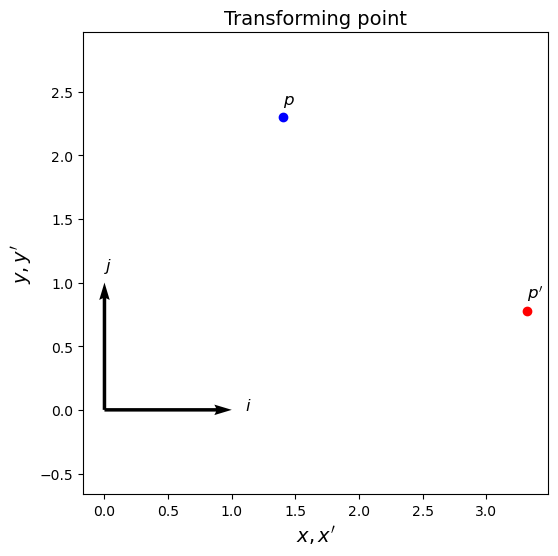

In [126]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Transforming point', fontsize=14)
#ax1.grid(True)

# unit vectors
i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='k', zorder=10)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='k', zorder=10)
# add some text
ax1.text(i[0]+0.1, i[1], '$i$', fontsize=12)
ax1.text(j[0], j[1]+0.1, '$j$', fontsize=12)

# a point p
p = np.array([1.4, 2.3])

# plot it
ax1.plot(p[0],p[1],'bo')

# add some text
ax1.text(p[0],p[1]+0.1, '$p$', fontsize=12)

# consider a random matrix
A = np.array([[0.4,1.2],[-0.1,0.4]])

# transform the point
p_ = A@p

# plot the transformed point
ax1.plot(p_[0],p_[1],'ro')

# add some text
ax1.text(p_[0],p_[1]+0.1, "$p'$", fontsize=12)

# make the axis lengths equal - so i and j are same size
ax1.axis('equal')

We can interpret what's happened here in terms of a coordinate transformation.

Given the unit vectors which are the typical basis used for $\mathbb{R}^2$


$$\boldsymbol{i} = \left(
  \begin{array}{c}
    1 \\
    0     
  \end{array}
\right),
\;\;\;\;\;\;\;\;
\boldsymbol{j} = \left(
  \begin{array}{c}
    0 \\
    1
  \end{array}
\right),
$$

then of course we can write

$$\boldsymbol{p} = 
\begin{pmatrix}
p_1\\
p_2
\end{pmatrix} = p_1 \boldsymbol{i} + p_2 \boldsymbol{j} 
$$

the transformed point is then

$$\boldsymbol{p}' = A\boldsymbol{p} = A(p_1 \boldsymbol{i} + p_2 \boldsymbol{j})
= p_1 (A\boldsymbol{i}) + p_2 (A\boldsymbol{j})
$$

(by linearity of matrix multiplication).

This emphasises that we can interpret multiplication by a matrix as a change of coordinates - our coordinate basis has been transformed from $(\boldsymbol{i},\boldsymbol{j})$ to $(A\boldsymbol{i},A\boldsymbol{j})$.

Now in this case, due to the particularly simple/special form of the starting basis: $\boldsymbol{i}$ and $\boldsymbol{j}$, this new basis is made up of the columns of $A$!

The transformation of a summation will then just be

$$(\boldsymbol{p}+\boldsymbol{q})' = A(\boldsymbol{p}+\boldsymbol{q}) = A((p_1+q_1) \boldsymbol{i} + (p_2+q_2) \boldsymbol{j})
= (p_1+q_1) (A\boldsymbol{i}) + (p_2+q_2) (A\boldsymbol{j})
$$

[A homework exercise asks you to plot a demonstration of this]

and similar for a scalar multiple.


## Some examples

Let's plot a few simple examples of transformations/matrices

(-0.1000000000000000,
 2.1000000000000001,
 -0.0500000000000000,
 1.0500000000000000)

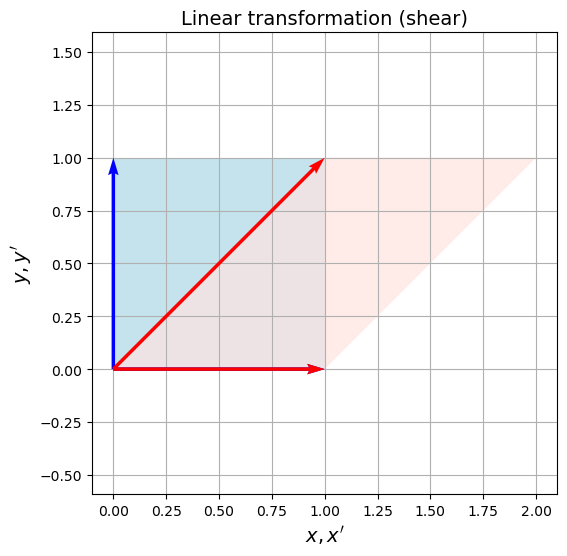

In [127]:
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (shear)', fontsize=14)
ax1.grid(True)

i = np.array([1,0])
j = np.array([0,1])

# plot the vectors~
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
# add a unit square image
ij = np.column_stack([np.zeros(2,),i,i+j,j]) # don't need to add zero at end as we will assume closed polygons
ax1.add_patch(Polygon( ij.T , facecolor='lightblue', alpha=0.7))

A = np.array([[1,1],[0,1]])
i_ = A@i
j_ = A@j

# and the vectors
ax1.quiver(i_[0], i_[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(j_[0], j_[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
# plot how the square transforms
ij_ = np.column_stack([np.zeros(2,),i_,i_+j_,j_]) # don't need to add zero at end as we will assume closed polygons
ax1.add_patch(Polygon( ij_.T , facecolor='mistyrose', alpha=0.7))


ax1.axis('equal')

Additionally in this figure we have plotted in light blue the unit square of area 1 which is spanned by the two original unit vectors. Under the coordinate transform, as well as the unit vectors transforming into the red vectors, the light blue square transforms into the light red parallelogram.

The area of a parallelogram is `base` $\times$ `height`, but for this example this is just $1\times 1$, i.e. the area has not changed under the transformation.

Note also that the determinant of the matrix is given by

$$
\begin{vmatrix}
1 & 1\\
0 & 1
\end{vmatrix} = 1
$$

and hence we have verified for this particular case the statement we made about the determinant: "Geometrically it gives the scaling of the volume (area in 2D) of a shape under the linear transformation represented by the matrix."

This is an example of shear <https://en.wikipedia.org/wiki/Shear_mapping>.

Let's try another common example:

(-0.2323305865502769,
 1.0586824088833464,
 -0.0579227965339569,
 1.2163787272130953)

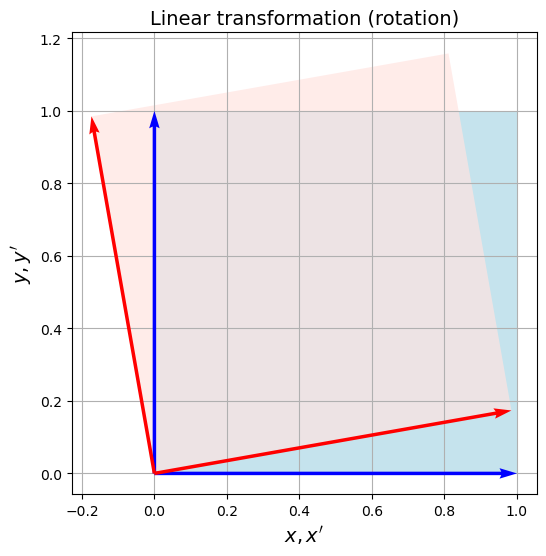

In [128]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (rotation)', fontsize=14)
ax1.grid(True)

i = np.array([1,0])
j = np.array([0,1])

# plot the vectors
ax1.quiver(i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(j[0], j[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
# add a unit square image
ij = np.column_stack([np.zeros(2,),i,i+j,j]) # don't need to add zero at end as we will assume closed polygons
ax1.add_patch(Polygon( ij.T , facecolor='lightblue', alpha=0.7))

theta = 10 *np.pi/180 # convert 10 degrees into radians
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
i_ = A@i
j_ = A@j


# and the vectors
ax1.quiver(i_[0], i_[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(j_[0], j_[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
# plot how the square transforms
ij_ = np.column_stack([np.zeros(2,),i_,i_+j_,j_]) # don't need to add zero at end as we will assume closed polygons
ax1.add_patch(Polygon( ij_.T , facecolor='mistyrose', alpha=0.7))

ax1.axis('equal')

In this case the matrix

$$A = 
\begin{pmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{pmatrix}
$$

corresponds to a rotation in the anti-clockwise direction by the angle $\theta$.  This is called a *rotation matrix*.


1. Based upon the matrix (rather than the above image which tells you what the answer should be) what is the area of the red area compared to the blue?


2. Are the transformed basis vectors orthonormal (unit length (normalised) and orthogonal to each other)? 


3. Consider a point $\boldsymbol{p}$ and corresponding vector from the origin  $\overrightarrow{op}$. Show that  $|\overrightarrow{op}|$ = $|\overrightarrow{op'}|$ where the latter is the length of the vector from the origin to the transformed point.

<div class="optional">

## A general transformation and the determinant again [\*]

Let's revert back to a general matrix 

$$\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}$$ 

and plot how the point

$$\boldsymbol{p} = 
\begin{pmatrix}
p_1\\
p_2
\end{pmatrix} = p_1 \boldsymbol{i} + p_2 \boldsymbol{j} 
$$

transforms:
    
</div>

(-0.2000000000000000, 2.5000000000000000)

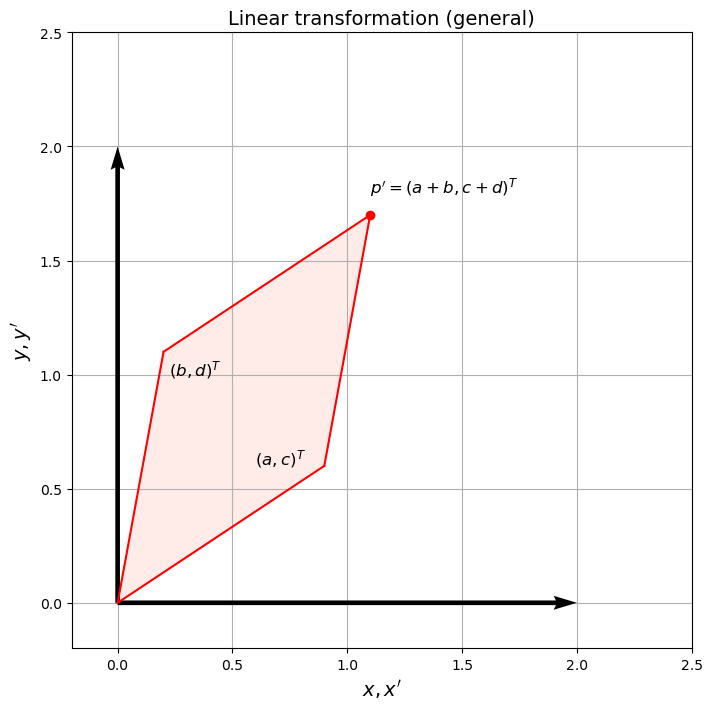

In [129]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (general)', fontsize=14)
ax1.grid(True)

# plot some larger axes for this image
ax1.quiver(2,0, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)
ax1.quiver(0,2, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)

# basis functions
i = np.array([1,0])
j = np.array([0,1])

# transform them
A = np.array([[0.9,0.2],[0.6,1.1]])
i_ = A@i
j_ = A@j

# plot how the square transforms
ij_ = np.column_stack([np.zeros(2,),i_,i_+j_,j_]) # don't need to add zero at end as we will assume closed polygons
ax1.add_patch(Polygon( ij_.T , facecolor='mistyrose', alpha=0.7))

# some borders
ax1.plot([0,i_[0]], [0,i_[1]], color='r', zorder=10)
ax1.plot([0,j_[0]], [0,j_[1]], color='r', zorder=10)
ax1.plot([i_[0],i_[0]+j_[0]], [i_[1],i_[1]+j_[1]], color='r', zorder=10)
ax1.plot([j_[0],i_[0]+j_[0]], [j_[1],i_[1]+j_[1]], color='r', zorder=10)

# add a point
p = i+j

# transform it
p_ = A@p

# plot the transformed point
ax1.plot(p_[0],p_[1],'ro')

# add some text
ax1.text(p_[0],p_[1]+0.1, "$p'=(a+b,c+d)^T$", fontsize=12)
ax1.text(i_[0]-0.3,i_[1]+0.01, "$(a,c)^T$", fontsize=12)
ax1.text(j_[0]+0.025,j_[1]-0.1, "$(b,d)^T$", fontsize=12)

ax1.set_xlim(-0.2,2.5)
ax1.set_ylim(-0.2,2.5)


<div class="optional">
    
In this case under multiplication by $A$ the basis vectors transform as: 

$$\boldsymbol{i} = 
\begin{pmatrix}
    1\\
    0
\end{pmatrix}
\longrightarrow
\begin{pmatrix}
    a\\
    c
\end{pmatrix}=
\begin{pmatrix}
    0.9\\
    0.6
\end{pmatrix},
\quad
\boldsymbol{j} = 
\begin{pmatrix}
    0\\
    1
\end{pmatrix}
\longrightarrow
\begin{pmatrix}
    b\\
    d
\end{pmatrix}=
\begin{pmatrix}
    0.2\\
    1.1
\end{pmatrix}
$$

What's the area of the resulting parallelogram ... it's the determinant. 

Let's confirm this after we first update the plot a little:
    
</div>

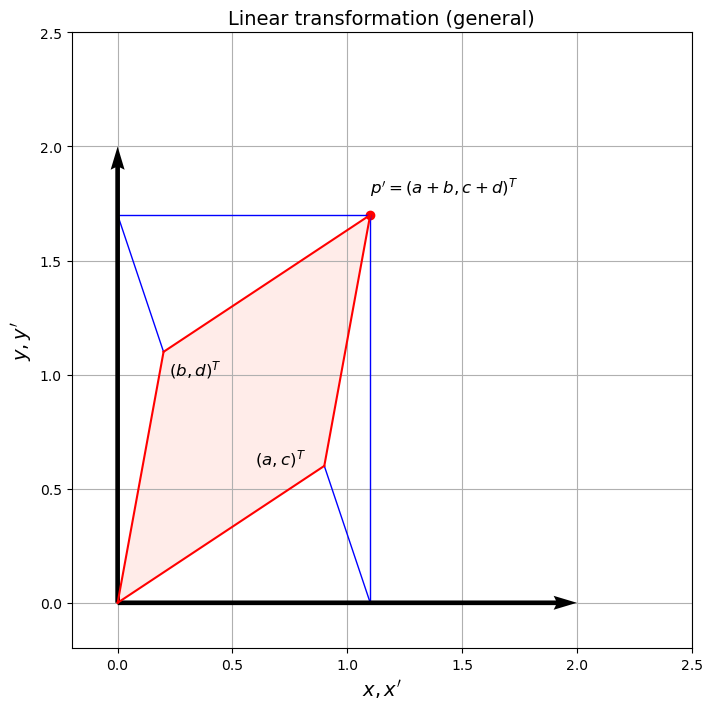

In [130]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation (general)', fontsize=14)
ax1.grid(True)

# plot some larger axes for this image
ax1.quiver(2,0, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)
ax1.quiver(0,2, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)

# basis functions
i = np.array([1,0])
j = np.array([0,1])

# transform them
A = np.array([[0.9,0.2],[0.6,1.1]])
i_ = A@i
j_ = A@j

# plot how the square transforms
ij_ = np.column_stack([np.zeros(2,),i_,i_+j_,j_]) # don't need to add zero at end as we will assume closed polygons
ax1.add_patch(Polygon( ij_.T , facecolor='mistyrose', alpha=0.7))

# some borders
ax1.plot([0,i_[0]], [0,i_[1]], color='r', zorder=10)
ax1.plot([0,j_[0]], [0,j_[1]], color='r', zorder=10)
ax1.plot([i_[0],i_[0]+j_[0]], [i_[1],i_[1]+j_[1]], color='r', zorder=10)
ax1.plot([j_[0],i_[0]+j_[0]], [j_[1],i_[1]+j_[1]], color='r', zorder=10)

# add a point
p = i+j

# transform it
p_ = A@p

# plot the transformed point
ax1.plot(p_[0],p_[1],'ro')

# add some text
ax1.text(p_[0],p_[1]+0.1, "$p'=(a+b,c+d)^T$", fontsize=12)
ax1.text(i_[0]-0.3,i_[1]+0.01, "$(a,c)^T$", fontsize=12)
ax1.text(j_[0]+0.025,j_[1]-0.1, "$(b,d)^T$", fontsize=12)

ax1.set_xlim(-0.2,2.5)
ax1.set_ylim(-0.2,2.5)

# add some lines
ax1.plot([0,p_[0]],[p_[1],p_[1]],'b',lw=1)
ax1.plot([p_[0],p_[0]],[0,p_[1]],'b',lw=1)
ax1.plot([i_[0],p_[0]],[i_[1],0],'b',lw=1)
ax1.plot([j_[0],0],[j_[1],p_[1]],'b',lw=1)

<div class="optional">

Using the following notation for the matrix entries

$$A =
\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}
$$

the area of red parallelogram in the image above can be computed as the area of the large blue square (which is $(a+b)\times (c+d)$) minus the areas of the four outer triangles, each of which can be computed as half their base multiplied by their height (the latter of which is easy to read off for each triangle as the distance from one of the horizontal or vertical lines). In the formula below I've started at the "Western" (left-most) triangle (which has area: half base times height $=(c+d)b/2$) and proceeded clockwise.

\begin{align*}
\text{Volume} &
= (a+b)(c+d) - 
\frac{1}{2}\left(
(c+d)b + (a+b)c + (c+d)b + (a+b)c 
\right)\\
& = ac+ad+bc+bd- 
\frac{1}{2}\left(
bc+bd+ac+bc+bc+bd+ac+bc
\right)\\
& = ac+ad+bc+bd- 
\frac{1}{2}\left(
4bc+2bd+2ac
\right)\\
& = ac+ad+bc+bd- 
2bc-bd-ac\\
&=ad-bc = |A|
\end{align*}

This is not the only way to do this. Firstly we could have spotted that the area of the two top-left triangles is the same as the two bottom right by symmetry to simplify our calculation a bit. We could also have split each these up into one rectangle and two right-angled triangles.

A homework exercise asks you to demonstrate the same thing using a [cross product](https://en.wikipedia.org/wiki/Cross_product).
    
</div>

<div class="optional">

# An animation [*]

With this knowledge we can create some interesting images/animations such as at the start of this lecture, see homework exercise.

For some pointers on generating animations see the discussions here:

<https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/>

<https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html>

<https://matplotlib.org/3.1.1/gallery/animation/animated_histogram.html>

<https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator>

</div>

# Summary

We have covered:


- A reminder on linear algebra - matrices, vectors and arithmetic with them.

<br>

- How to formulate and solve linear systems.

<br>

- When linear systems have a unique solution ... determinant ... the inverse of a matrix.

<br>

- Vector bases, linear independence, and how this links to the solution of linear systems.

<br>

- The rank, range and null space of a matrix and how these link to the unique solution of linear systems.

<br>

- Some geometrical interpretations of linear systems/transformations; the solvability of linear systems in terms of columns/vector basis.

## Next lecture

We will move the linear algebra review on to eigenvalues and eigenvectors, more geometrical interpretations, and use of linear algebra in the analysis and solution of (systems of) ordinary differential equations (ODEs).
